# Finetuned YOLO Model Evaluation

## Import / Setup

In [52]:
import os
from pathlib import Path
from datetime import datetime
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
from ultralytics.data import utils as data_utils
from PIL import Image
from typing import Optional
from tqdm import tqdm
import time

In [5]:
%matplotlib inline

In [6]:
# ====  SET UP PATHS ====
# Get current working directory
current_dir = os.getcwd()

# Go up one level to the parent directory
parent_dir = os.path.dirname(current_dir)

# Source folder for images
source_folder_idximg = Path(parent_dir) / "idx_images"

# List of idx images and image metadata
path_idx_list = os.path.join(source_folder_idximg, r"image_metadata.csv")

# Destination folder save file outputs 
destination_folder_results = os.path.join(parent_dir, r"results")
os.makedirs(destination_folder_results, exist_ok=True)

# Destination folder wave detected images
destination_folder_model_results = os.path.join(parent_dir, r"results\model_results")
os.makedirs(destination_folder_model_results, exist_ok=True)

# Training, Eval dataset root where YOLO dataset was created by finetuning
#dataset_root = os.path.join(parent_dir, "waves_yolo_dataset_1000_nano")
dataset_root = os.path.join(parent_dir, "waves_yolo_dataset_5000_nano")


In [44]:
print(source_folder_idximg)
print(path_idx_list)

C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images
C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images\image_metadata.csv


In [8]:
# Paths for deeplearning models

# Source folder finetuned models
source_folder_deepL = Path(parent_dir, r"img_labeling")

# Paths to finetuned models
yolo8v_N_1000_50  = os.path.join(source_folder_deepL, r"02_waves_yolov8n-1000_50e.pt")
yolo8v_N_1000_150 = os.path.join(source_folder_deepL, r"02_waves_yolov8n-1000_150e.pt")
yolo8v_S_1000_150 = os.path.join(source_folder_deepL, r"03_waves_yolov8s-1000_150e.pt")
yolo8v_S_5000_150 = os.path.join(source_folder_deepL, r"04_waves_yolov8s-5000_150e.pt")

# Create YOLO data.yaml
data_yaml_path = os.path.join(dataset_root, "01_waves.yaml")

In [9]:
# Load validation dataset


info = data_utils.check_det_dataset(data_yaml_path)
print("Train source:", info["train"])
print("Val source:  ", info["val"])
print("Test source: ", info["test"])

Train source: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\waves_yolo_dataset_5000_nano\train.txt
Val source:   C:\Users\A\Documents\XX_GitHub_Repo\data-waves\waves_yolo_dataset_5000_nano\val.txt
Test source:  C:\Users\A\Documents\XX_GitHub_Repo\data-waves\waves_yolo_dataset_5000_nano\test.txt


## Evaluate and compare YOLO models on test set - resolution 1024 px


=== Evaluating yolov8n_1000_50e ===
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1890.4531.6 MB/s, size: 1873.5 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:42


                   all       1000     622135    0.00389    0.00137    0.00318   0.000567
Speed: 0.7ms preprocess, 7.6ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs\detect\val44

=== Evaluating yolov8n_1000_150e ===
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2018.9123.6 MB/s, size: 1972.5 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:42


                   all       1000     622135    0.00255   0.000868    0.00293   0.000427
Speed: 0.6ms preprocess, 7.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs\detect\val45

=== Evaluating yolov8s_1000_150e ===
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1684.3415.5 MB/s, size: 2286.6 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:48


                   all       1000     622135    0.00323    0.00108    0.00285   0.000665
Speed: 0.6ms preprocess, 16.5ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs\detect\val46

=== Evaluating yolov8s_5000_150e ===
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1441.0305.2 MB/s, size: 2259.1 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:50


                   all       1000     622135    0.00271   0.000952    0.00206    0.00067
Speed: 0.6ms preprocess, 21.6ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs\detect\val47


model  precision    recall  \
model_name                                                              
yolov8n_1000_50e    02_waves_yolov8n-1000_50e.pt   0.003894  0.001368   
yolov8n_1000_150e  02_waves_yolov8n-1000_150e.pt   0.002553  0.000868   
yolov8s_1000_150e  03_waves_yolov8s-1000_150e.pt   0.003228  0.001080   
yolov8s_5000_150e  04_waves_yolov8s-5000_150e.pt   0.002714  0.000952   

                      mAP50  mAP50-95 split  
model_name                                   
yolov8n_1000_50e   0.003180  0.000567  test  
yolov8n_1000_150e  0.002932  0.000427  test  
yolov8s_1000_150e  0.002849  0.000665  test  
yolov8s_5000_150e  0.002059  0.000670  test

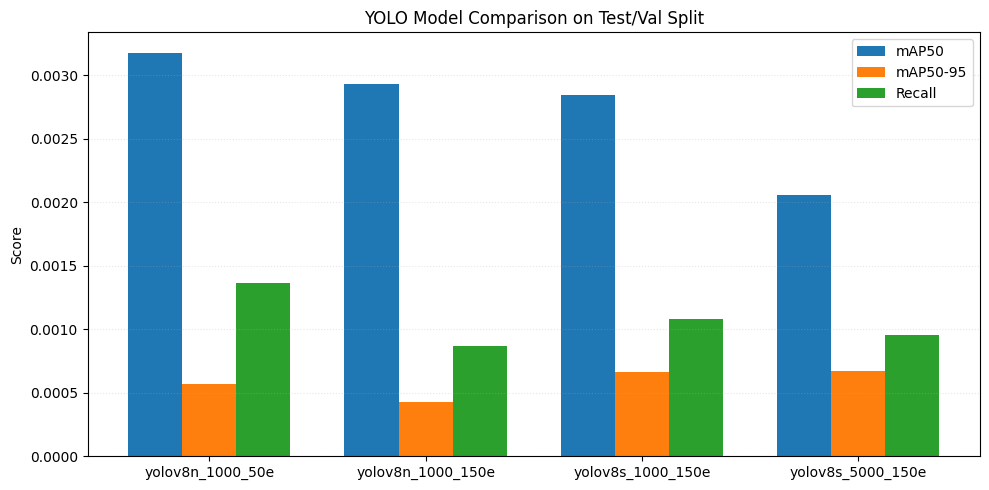

Saved plot → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_1024px.png


In [20]:
import os
from pathlib import Path
import yaml  # <-- use PyYAML, always available

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO


# ---------------------------------------------------------
# 0. PATHS AND MODEL SETUP
# ---------------------------------------------------------
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

#dataset_root = os.path.join(parent_dir, "waves_yolo_dataset_5000_nano")
#data_yaml_path = os.path.join(dataset_root, "01_waves.yaml")

source_folder_deepL = Path(parent_dir, r"img_labeling")
destination_folder_results = os.path.join(parent_dir, "results")
os.makedirs(destination_folder_results, exist_ok=True)

models_to_compare = {
    "yolov8n_1000_50e":  os.path.join(source_folder_deepL, "02_waves_yolov8n-1000_50e.pt"),
    "yolov8n_1000_150e": os.path.join(source_folder_deepL, "02_waves_yolov8n-1000_150e.pt"),
    "yolov8s_1000_150e": os.path.join(source_folder_deepL, "03_waves_yolov8s-1000_150e.pt"),
    "yolov8s_5000_150e": os.path.join(source_folder_deepL, "04_waves_yolov8s-5000_150e.pt"),
}

DEVICE = "cuda"
IMG_SIZE = 1024
#IMG_SIZE = (512, 2048)
CONF_THRES = 0.001


# ---------------------------------------------------------
# 1. EVALUATION FUNCTION
# ---------------------------------------------------------
def evaluate_model(model_path, data_yaml, split="test"):
    """
    Evaluate YOLO model on the specified dataset split.
    Compatible with ALL Ultralytics versions.
    """
    model = YOLO(model_path)

    # load yaml using PyYAML
    with open(data_yaml, "r") as f:
        ycfg = yaml.safe_load(f)

    # if no test split, fall back to val
    if split == "test" and ("test" not in ycfg or ycfg["test"] is None):
        print(f"[{model_path}] No test set in YAML → using val split")
        split = "val"

    results = model.val(
        data=data_yaml,
        split=split,
        imgsz=IMG_SIZE,
        device=DEVICE,
        conf=CONF_THRES,
        verbose=False,
    )

    # Retrieve metrics (ultralytics standard)
    prec, rec, map50, map5095 = results.box.mean_results()

    return {
        "model": os.path.basename(model_path),
        "precision": float(prec),
        "recall": float(rec),
        "mAP50": float(map50),
        "mAP50-95": float(map5095),
        "split": split,
    }


# ---------------------------------------------------------
# 2. RUN EVALUATION ON ALL MODELS
# ---------------------------------------------------------
all_metrics_1024 = []
for name, mpath in models_to_compare.items():
    print(f"\n=== Evaluating {name} ===")
    m = evaluate_model(mpath, data_yaml_path, split="test")
    m["model_name"] = name
    all_metrics_1024.append(m)

df_metrics_1024 = pd.DataFrame(all_metrics_1024).set_index("model_name")
display(df_metrics_1024)


# ---------------------------------------------------------
# 3. PLOT BAR CHART
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))
x = np.arange(len(df_metrics_1024))
width = 0.25

plt.bar(x - width, df_metrics_1024["mAP50"], width, label="mAP50")
plt.bar(x,         df_metrics_1024["mAP50-95"], width, label="mAP50-95")
plt.bar(x + width, df_metrics_1024["recall"], width, label="Recall")

plt.xticks(x, df_metrics_1024.index, rotation=0)
plt.grid(axis="y", alpha=0.3, linestyle=":")
plt.ylabel("Score")
plt.title("YOLO Model Comparison on Test/Val Split")
plt.legend()
plt.tight_layout()

save_path = os.path.join(destination_folder_model_results, "model_comparison_metrics_1024px.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved plot →", save_path)


In [21]:
# mapping from index (model_name) to reference label
model_reference_map = {
    "yolov8n_1000_50e": "Model-1",
    "yolov8n_1000_150e": "Model-2",
    "yolov8s_1000_150e": "Model-3",
    "yolov8s_5000_150e": "Model-4",
}

df_metrics_1024["model_reference"] = df_metrics_1024.index.map(model_reference_map)

In [22]:
df_metrics_1024.head()

model  precision    recall  \
model_name                                                              
yolov8n_1000_50e    02_waves_yolov8n-1000_50e.pt   0.003894  0.001368   
yolov8n_1000_150e  02_waves_yolov8n-1000_150e.pt   0.002553  0.000868   
yolov8s_1000_150e  03_waves_yolov8s-1000_150e.pt   0.003228  0.001080   
yolov8s_5000_150e  04_waves_yolov8s-5000_150e.pt   0.002714  0.000952   

                      mAP50  mAP50-95 split model_reference  
model_name                                                   
yolov8n_1000_50e   0.003180  0.000567  test         Model-1  
yolov8n_1000_150e  0.002932  0.000427  test         Model-2  
yolov8s_1000_150e  0.002849  0.000665  test         Model-3  
yolov8s_5000_150e  0.002059  0.000670  test         Model-4

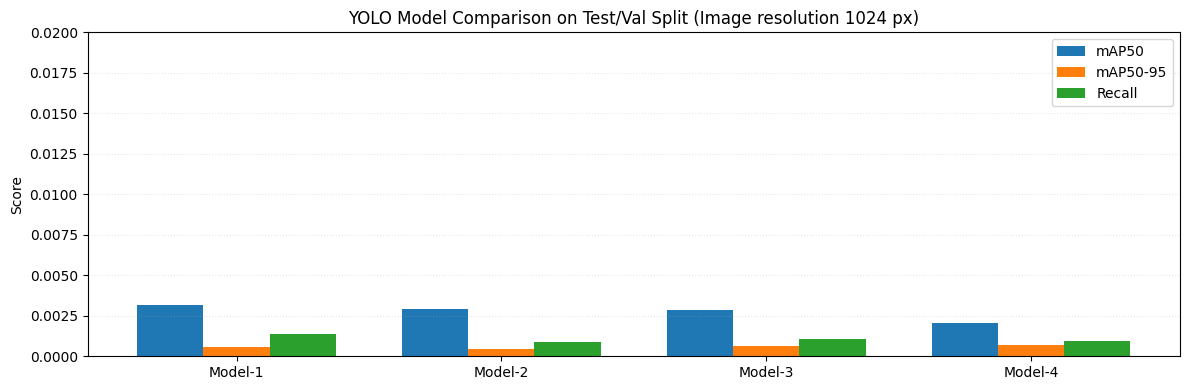

In [24]:
# ---------------------------------------------------------
# 3. PLOT BAR CHART (Model Reference and defined y Axis)
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))

x = np.arange(len(df_metrics_1024))
width = 0.25

plt.bar(x - width, df_metrics_1024["mAP50"], width, label="mAP50")
plt.bar(x,         df_metrics_1024["mAP50-95"], width, label="mAP50-95")
plt.bar(x + width, df_metrics_1024["recall"], width, label="Recall")

# ---- MATCH AXIS SCALE ----
plt.ylim(0, 0.02)
plt.yticks(np.arange(0, 0.0201, 0.0025))

# ---- MATCH X LABELS ----
plt.xticks(x, df_metrics_1024.model_reference, rotation=0)

plt.grid(axis="y", alpha=0.3, linestyle=":")
plt.ylabel("Score")
plt.title("YOLO Model Comparison on Test/Val Split (Image resolution 1024 px)")
plt.legend()
plt.tight_layout()
save_path = os.path.join(destination_folder_model_results, "model_comparison_metrics_1024px_NEW.png")
plt.savefig(save_path, dpi=300)
plt.show()


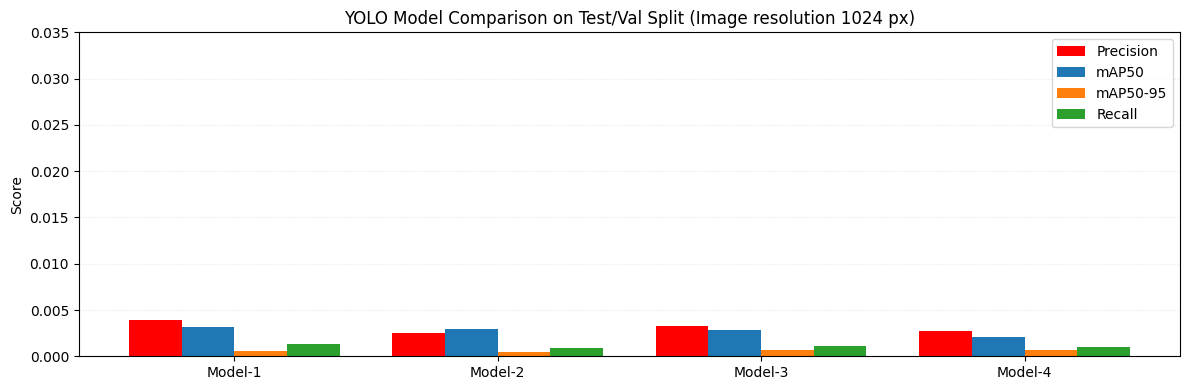

Saved plot → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_1024px_NEW.png


In [28]:
# ---------------------------------------------------------
# 3. PLOT BAR CHART (Model Reference and defined y Axis)
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))

x = np.arange(len(df_metrics_1024))
width = 0.20   # narrower bars to fit 4 metrics

plt.bar(x - 1.5*width, df_metrics_1024["precision"], width,
        label="Precision", color="red")

plt.bar(x - 0.5*width, df_metrics_1024["mAP50"], width,
        label="mAP50")

plt.bar(x + 0.5*width, df_metrics_1024["mAP50-95"], width,
        label="mAP50-95")

plt.bar(x + 1.5*width, df_metrics_1024["recall"], width,
        label="Recall")

# ---- MATCH AXIS SCALE ----
plt.ylim(0, 0.035)
plt.yticks(np.arange(0, 0.0351, 0.005))

# ---- MATCH X LABELS ----
plt.xticks(x, df_metrics_1024["model_reference"], rotation=0)

plt.grid(axis="y", alpha=0.3, linestyle=":")
plt.ylabel("Score")
plt.title("YOLO Model Comparison on Test/Val Split (Image resolution 1024 px)")
plt.legend()
plt.tight_layout()

save_path = os.path.join(
    destination_folder_model_results,
    "model_comparison_metrics_1024px_NEW.png"
)
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved plot →", save_path)


## Evaluate and compare YOLO models on test set - resolution 2048 px


=== Evaluating yolov8n_1000_50e ===
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.40.1 ms, read: 823.094.5 MB/s, size: 2273.2 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:52


                   all       1000     622135     0.0262      0.011     0.0149    0.00373
Speed: 1.4ms preprocess, 26.3ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs\detect\val34

=== Evaluating yolov8n_1000_150e ===
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 927.4596.6 MB/s, size: 2556.0 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:07


                   all       1000     622135     0.0167    0.00694    0.00934    0.00233
Speed: 1.9ms preprocess, 31.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs\detect\val35

=== Evaluating yolov8s_1000_150e ===
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1781.6292.5 MB/s, size: 2002.1 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [06:22


                   all       1000     622135     0.0311     0.0126     0.0175    0.00437
Speed: 1.7ms preprocess, 367.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\val36

=== Evaluating yolov8s_5000_150e ===
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1317.4168.8 MB/s, size: 2338.3 KB)


val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 1000 images, 56 backgrounds, 0 corrupt
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [06:36


                   all       1000     622135     0.0334     0.0134     0.0186    0.00476
Speed: 1.9ms preprocess, 380.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\val37


model  precision    recall  \
model_name                                                              
yolov8n_1000_50e    02_waves_yolov8n-1000_50e.pt   0.026168  0.010962   
yolov8n_1000_150e  02_waves_yolov8n-1000_150e.pt   0.016702  0.006942   
yolov8s_1000_150e  03_waves_yolov8s-1000_150e.pt   0.031105  0.012631   
yolov8s_5000_150e  04_waves_yolov8s-5000_150e.pt   0.033440  0.013439   

                      mAP50  mAP50-95 split  
model_name                                   
yolov8n_1000_50e   0.014852  0.003731  test  
yolov8n_1000_150e  0.009335  0.002334  test  
yolov8s_1000_150e  0.017481  0.004373  test  
yolov8s_5000_150e  0.018638  0.004757  test

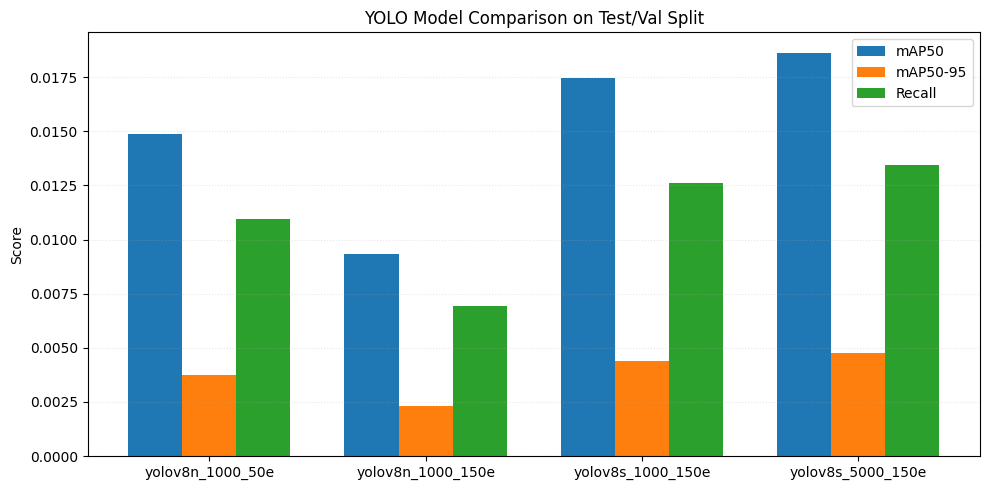

Saved plot → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics.png


In [10]:
import os
from pathlib import Path
import yaml  # <-- use PyYAML, always available

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO


# ---------------------------------------------------------
# 0. PATHS AND MODEL SETUP
# ---------------------------------------------------------
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

#dataset_root = os.path.join(parent_dir, "waves_yolo_dataset_5000_nano")
#data_yaml_path = os.path.join(dataset_root, "01_waves.yaml")

source_folder_deepL = Path(parent_dir, r"img_labeling")
destination_folder_results = os.path.join(parent_dir, "results")
os.makedirs(destination_folder_results, exist_ok=True)

models_to_compare = {
    "yolov8n_1000_50e":  os.path.join(source_folder_deepL, "02_waves_yolov8n-1000_50e.pt"),
    "yolov8n_1000_150e": os.path.join(source_folder_deepL, "02_waves_yolov8n-1000_150e.pt"),
    "yolov8s_1000_150e": os.path.join(source_folder_deepL, "03_waves_yolov8s-1000_150e.pt"),
    "yolov8s_5000_150e": os.path.join(source_folder_deepL, "04_waves_yolov8s-5000_150e.pt"),
}

DEVICE = "cuda"
#IMG_SIZE = 1024
IMG_SIZE = (512, 2048)
CONF_THRES = 0.001


# ---------------------------------------------------------
# 1. EVALUATION FUNCTION
# ---------------------------------------------------------
def evaluate_model(model_path, data_yaml, split="test"):
    """
    Evaluate YOLO model on the specified dataset split.
    Compatible with ALL Ultralytics versions.
    """
    model = YOLO(model_path)

    # load yaml using PyYAML
    with open(data_yaml, "r") as f:
        ycfg = yaml.safe_load(f)

    # if no test split, fall back to val
    if split == "test" and ("test" not in ycfg or ycfg["test"] is None):
        print(f"[{model_path}] No test set in YAML → using val split")
        split = "val"

    results = model.val(
        data=data_yaml,
        split=split,
        imgsz=IMG_SIZE,
        device=DEVICE,
        conf=CONF_THRES,
        verbose=False,
    )

    # Retrieve metrics (ultralytics standard)
    prec, rec, map50, map5095 = results.box.mean_results()

    return {
        "model": os.path.basename(model_path),
        "precision": float(prec),
        "recall": float(rec),
        "mAP50": float(map50),
        "mAP50-95": float(map5095),
        "split": split,
    }


# ---------------------------------------------------------
# 2. RUN EVALUATION ON ALL MODELS
# ---------------------------------------------------------
all_metrics = []
for name, mpath in models_to_compare.items():
    print(f"\n=== Evaluating {name} ===")
    m = evaluate_model(mpath, data_yaml_path, split="test")
    m["model_name"] = name
    all_metrics.append(m)

df_metrics = pd.DataFrame(all_metrics).set_index("model_name")
display(df_metrics)


# ---------------------------------------------------------
# 3. PLOT BAR CHART
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))
x = np.arange(len(df_metrics))
width = 0.25

plt.bar(x - width, df_metrics["mAP50"], width, label="mAP50")
plt.bar(x,         df_metrics["mAP50-95"], width, label="mAP50-95")
plt.bar(x + width, df_metrics["recall"], width, label="Recall")

plt.xticks(x, df_metrics.index, rotation=0)
plt.grid(axis="y", alpha=0.3, linestyle=":")
plt.ylabel("Score")
plt.title("YOLO Model Comparison on Test/Val Split")
plt.legend()
plt.tight_layout()

save_path = os.path.join(destination_folder_model_results, "model_comparison_metrics.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved plot →", save_path)


In [11]:
# mapping from index (model_name) to reference label
model_reference_map = {
    "yolov8n_1000_50e": "Model-1",
    "yolov8n_1000_150e": "Model-2",
    "yolov8s_1000_150e": "Model-3",
    "yolov8s_5000_150e": "Model-4",
}

df_metrics["model_reference"] = df_metrics.index.map(model_reference_map)

In [12]:
df_metrics.head()

model  precision    recall  \
model_name                                                              
yolov8n_1000_50e    02_waves_yolov8n-1000_50e.pt   0.026168  0.010962   
yolov8n_1000_150e  02_waves_yolov8n-1000_150e.pt   0.016702  0.006942   
yolov8s_1000_150e  03_waves_yolov8s-1000_150e.pt   0.031105  0.012631   
yolov8s_5000_150e  04_waves_yolov8s-5000_150e.pt   0.033440  0.013439   

                      mAP50  mAP50-95 split model_reference  
model_name                                                   
yolov8n_1000_50e   0.014852  0.003731  test         Model-1  
yolov8n_1000_150e  0.009335  0.002334  test         Model-2  
yolov8s_1000_150e  0.017481  0.004373  test         Model-3  
yolov8s_5000_150e  0.018638  0.004757  test         Model-4

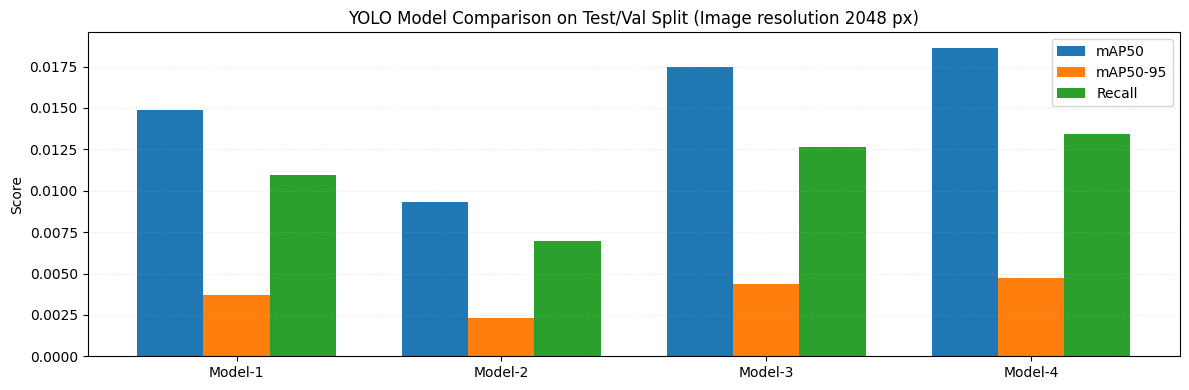

Saved plot → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_model_names_NEW.png


In [18]:

# ---------------------------------------------------------
# 3. PLOT BAR CHART with model names
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))
x = np.arange(len(df_metrics))
width = 0.25

plt.bar(x - width, df_metrics["mAP50"], width, label="mAP50")
plt.bar(x,         df_metrics["mAP50-95"], width, label="mAP50-95")
plt.bar(x + width, df_metrics["recall"], width, label="Recall")

plt.xticks(x, df_metrics.model_reference, rotation=0)
plt.grid(axis="y", alpha=0.3, linestyle=":")
plt.ylabel("Score")
plt.title("YOLO Model Comparison on Test/Val Split (Image resolution 2048 px)")
plt.legend()
plt.tight_layout()

save_path = os.path.join(destination_folder_model_results, "model_comparison_metrics_model_names_NEW.png")
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved plot →", save_path)

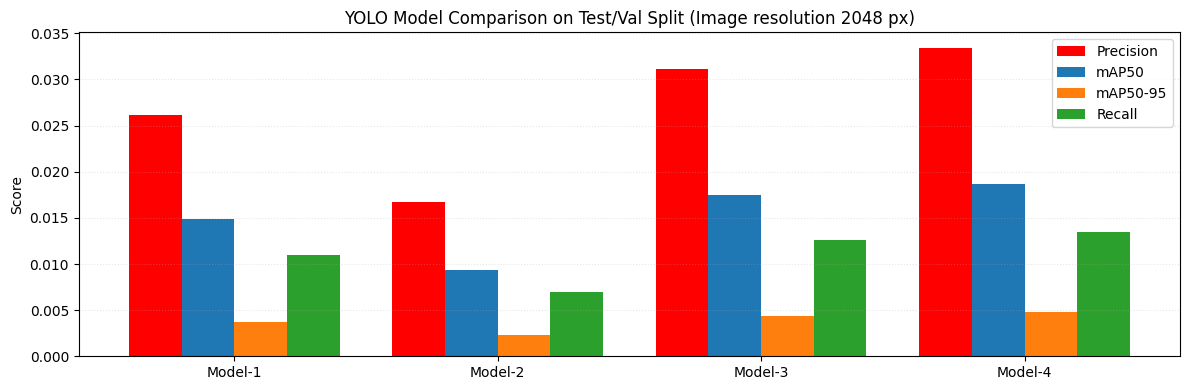

Saved plot → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_model_names_NEW.png


In [25]:
# ---------------------------------------------------------
# 3. PLOT BAR CHART with model names
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))

x = np.arange(len(df_metrics))
width = 0.20   # slightly narrower to fit 4 bars

plt.bar(x - 1.5*width, df_metrics["precision"], width,
        label="Precision", color="red")

plt.bar(x - 0.5*width, df_metrics["mAP50"], width,
        label="mAP50")

plt.bar(x + 0.5*width, df_metrics["mAP50-95"], width,
        label="mAP50-95")

plt.bar(x + 1.5*width, df_metrics["recall"], width,
        label="Recall")

plt.xticks(x, df_metrics["model_reference"], rotation=0)
plt.grid(axis="y", alpha=0.3, linestyle=":")
plt.ylabel("Score")
plt.title("YOLO Model Comparison on Test/Val Split (Image resolution 2048 px)")
plt.legend()
plt.tight_layout()

save_path = os.path.join(
    destination_folder_model_results,
    "model_comparison_metrics_model_names_NEW.png"
)
plt.savefig(save_path, dpi=300)
plt.show()

print("Saved plot →", save_path)

## Evaluate and compare YOLO models unseen conditions from August

In [29]:
# USER-DEFINED FILTER RANGE OF SELECTED IMAGES
# ------------------------------------------------------------
START = "2025-08-01 02:00"
END   = "2025-08-31 23:50"

start_dt = datetime.strptime(START, "%Y-%m-%d %H:%M")
end_dt   = datetime.strptime(END,   "%Y-%m-%d %H:%M")


In [30]:
# ==== 1. LOAD CSV ====
df = pd.read_csv(path_idx_list)
print("CSV shape:", df.shape)
print("Columns:", list(df.columns))

# Expecting: new_image_name, date, time
required_cols = {"new_image_name", "date", "time"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing columns in {path_idx_list}: {missing}")

CSV shape: (27592, 5)
Columns: ['new_image_name', 'date', 'time', 'season', 'daytime']


In [31]:
# ==== 1. LOAD CSV ====
df = pd.read_csv(path_idx_list)
print("CSV shape:", df.shape)
print("Columns:", list(df.columns))

required_cols = {"new_image_name", "date", "time"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing columns in {path_idx_list}: {missing}")

# ==== 2. BUILD & FIX DATETIME COLUMN ====
df["date"] = df["date"].astype(str).str.strip()
df["time"] = df["time"].astype(str).str.strip()

df["raw_dt"] = df["date"] + " " + df["time"]

# Pass 1: assume European format (dd/mm/yyyy) – this also handles ISO nicely
dt1 = pd.to_datetime(df["raw_dt"], dayfirst=True, errors="coerce")

# Pass 2: re-parse only NaT rows with a more liberal parser (dayfirst=False)
mask_nat = dt1.isna()
if mask_nat.any():
    print(f"⚠️ {mask_nat.sum()} rows failed on pass 1, trying alternative parse...")
    dt2 = pd.to_datetime(df.loc[mask_nat, "raw_dt"], errors="coerce")
    dt1.loc[mask_nat] = dt2

df["dt"] = dt1

# Report any remaining NaTs
mask_nat_final = df["dt"].isna()
if mask_nat_final.any():
    print(f"⚠️ After two passes, {mask_nat_final.sum()} rows are still NaT. "
          "Examples of problematic rows:")
    print(df.loc[mask_nat_final, ["new_image_name", "raw_dt"]].head())
else:
    print("✅ All rows parsed to valid datetimes.")

print("\nGlobal datetime range in CSV (parsed):")
print("  min:", df["dt"].min())
print("  max:", df["dt"].max())

# Quick sanity check: how many rows in August 2025?
mask_aug = (df["dt"] >= datetime(2025, 8, 1)) & (df["dt"] < datetime(2025, 9, 1))
print("Rows in August 2025:", mask_aug.sum())

CSV shape: (27592, 5)
Columns: ['new_image_name', 'date', 'time', 'season', 'daytime']
⚠️ 12257 rows failed on pass 1, trying alternative parse...
✅ All rows parsed to valid datetimes.

Global datetime range in CSV (parsed):
  min: 2022-05-01 12:00:00
  max: 2025-11-15 23:40:00
Rows in August 2025: 3146


In [32]:
# ==== 3. FILTER BY START/END ====
mask = (df["dt"] >= start_dt) & (df["dt"] <= end_dt)
df_sel = df.loc[mask].copy()

if df_sel.empty:
    print(f"\n⚠️ No images found between {START} and {END}.")
else:
    print(f"\n✅ Selected {len(df_sel)} images between {START} and {END}.")

df_sel = df_sel.sort_values("dt").reset_index(drop=True)

# ==== 4. BUILD IMAGE PATHS ====
image_paths = []
for _, row in df_sel.iterrows():
    img_name = str(row["new_image_name"]).strip()  # e.g. img_00001.png
    full_path = source_folder_idximg / img_name
    image_paths.append(full_path)

# ==== 5. WRITE VALIDATION LIST TXT ====
start_tag = START.replace(" ", "-").replace(":", "")
end_tag   = END.replace(" ", "-").replace(":", "")

save_name = f"{start_tag}_{end_tag}_validation_list.txt"
save_path = os.path.join(destination_folder_model_results, save_name)

with open(save_path, "w", encoding="utf-8") as f:
    for p in image_paths:
        f.write(str(p) + "\n")

print(f"\n📝 Wrote {len(image_paths)} image paths to:")
print("   ", save_path)


✅ Selected 3140 images between 2025-08-01 02:00 and 2025-08-31 23:50.

📝 Wrote 3140 image paths to:
    C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\2025-08-01-0200_2025-08-31-2350_validation_list.txt


In [33]:
with open(save_path, "r", encoding="utf-8") as f:
    selected_images = [line.strip() for line in f if line.strip()]

print(f"Found {len(selected_images)} images for evaluation.")


Found 3140 images for evaluation.


In [34]:
# ---------------------------------------------------------
# CONFIG: use the same settings as in your wave pipeline
# ---------------------------------------------------------
DEVICE   = "cuda"   # or "cpu"
CONF_THR = 0.005
IOU_NMS  = 0.9          # NMS IoU (not the GT-matching IoU)
IMG_SIZE = (512, 2048)
MAX_DET  = 10000


In [35]:
# ---------------------------------------------------------
# HELPER: label path from image path
#   images: parent_dir/images/img_00001.png
#   labels: parent_dir/idx_images/img_00001.txt
# ---------------------------------------------------------
source_folder_idximg = Path(parent_dir) / "idx_images"

def yolo_label_path_from_image(img_path: Path) -> Path:
    stem = img_path.stem          # img_00001
    return source_folder_idximg / f"{stem}.txt"


# ---------------------------------------------------------
# HELPER: load GT boxes (YOLO txt) for given class_id
#   Each line: class cx cy w h  (normalised)
# ---------------------------------------------------------
def load_gt_boxes(label_path: Path, wave_class_id: int = 0):
    if not label_path.exists():
        return []
    boxes = []
    with open(label_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls = int(parts[0])
            if cls != wave_class_id:
                continue
            cx, cy, w, h = map(float, parts[1:])
            boxes.append([cx, cy, w, h])
    return boxes


# ---------------------------------------------------------
# HELPER: convert YOLO normalised -> xyxy (pixels)
# ---------------------------------------------------------
def yolo_norm_to_xyxy(boxes_norm, img_w, img_h):
    out = []
    for cx, cy, w, h in boxes_norm:
        x1 = (cx - w/2) * img_w
        y1 = (cy - h/2) * img_h
        x2 = (cx + w/2) * img_w
        y2 = (cy + h/2) * img_h
        out.append([x1, y1, x2, y2])
    return out


# ---------------------------------------------------------
# HELPER: IoU between two xyxy boxes
# ---------------------------------------------------------
def compute_iou(box_a, box_b):
    ax1, ay1, ax2, ay2 = box_a
    bx1, by1, bx2, by2 = box_b

    ix1 = max(ax1, bx1)
    iy1 = max(ay1, by1)
    ix2 = min(ax2, bx2)
    iy2 = min(ay2, by2)

    iw = max(0.0, ix2 - ix1)
    ih = max(0.0, iy2 - iy1)
    inter = iw * ih
    if inter <= 0.0:
        return 0.0

    area_a = max(0.0, ax2 - ax1) * max(0.0, ay2 - ay1)
    area_b = max(0.0, bx2 - bx1) * max(0.0, by2 - by1)
    union = area_a + area_b - inter
    if union <= 0.0:
        return 0.0
    return inter / union



In [36]:
# =========================================================
# EVALUATION FUNCTION
# =========================================================
def evaluate_on_subset(
    model_path,
    image_paths,
    wave_class_id: int = 0,
    iou_thr: float = 0.5,          # GT-matching IoU
    conf_thr: float = CONF_THR,    # inference conf
    iou_nms: float = IOU_NMS,      # NMS IoU
    imgsz = IMG_SIZE,
    max_det: int = MAX_DET,
):
    """
    Evaluate one model on a subset of images.

    Returns:
      df      : per-image stats
      metrics : dict (MAE, RMSE, precision, recall, TP, FP, FN, counts)
    """
    model = YOLO(model_path)

    rows = []
    total_tp = total_fp = total_fn = 0
    n_images_total = 0
    n_images_with_gt = 0
    n_images_skipped_no_gt = 0

    for img_path in image_paths:
        img_path = Path(img_path)
        n_images_total += 1

        if not img_path.exists():
            print(f"⚠️ Image not found (skipping): {img_path}")
            continue

        # --- ground truth ---
        label_path = yolo_label_path_from_image(img_path)
        gt_norm_boxes = load_gt_boxes(label_path, wave_class_id=wave_class_id)

        if len(gt_norm_boxes) == 0:
            n_images_skipped_no_gt += 1
            continue

        n_images_with_gt += 1

        with Image.open(img_path) as im:
            w, h = im.size

        gt_boxes = yolo_norm_to_xyxy(gt_norm_boxes, w, h)
        n_gt = len(gt_boxes)

        # --- predictions with YOUR SETTINGS ---
        try:
            preds = model(
                str(img_path),
                device=DEVICE,
                imgsz=imgsz,
                conf=conf_thr,
                iou=iou_nms,
                max_det=max_det,
                verbose=False,
            )
        except Exception as e:
            print(f"⚠️ Inference failed on {img_path}: {e}")
            continue

        if len(preds) == 0 or preds[0].boxes is None:
            pred_boxes = []
        else:
            b = preds[0].boxes
            cls_ids = b.cls.cpu().numpy().astype(int)
            mask = (cls_ids == wave_class_id)
            if mask.sum() == 0:
                pred_boxes = []
            else:
                xyxy = b.xyxy.cpu().numpy()
                pred_boxes = xyxy[mask].tolist()

        n_pred = len(pred_boxes)
        count_error = n_pred - n_gt

        # --- greedy matching for TP/FP/FN (GT IoU) ---
        matched_gt = set()
        tp = fp = 0

        for pb in pred_boxes:
            best_iou = 0.0
            best_j = -1
            for j, gb in enumerate(gt_boxes):
                if j in matched_gt:
                    continue
                iou = compute_iou(pb, gb)
                if iou > best_iou:
                    best_iou = iou
                    best_j = j

            if best_iou >= iou_thr and best_j >= 0:
                tp += 1
                matched_gt.add(best_j)
            else:
                fp += 1

        fn = n_gt - len(matched_gt)

        total_tp += tp
        total_fp += fp
        total_fn += fn

        rows.append({
            "image": str(img_path),
            "n_gt": n_gt,
            "n_pred": n_pred,
            "count_error": count_error,
            "tp": tp,
            "fp": fp,
            "fn": fn,
        })

    df = pd.DataFrame(rows)

    if df.empty:
        print("⚠️ No images with GT waves were evaluated.")
        metrics = {
            "MAE_wave_count": np.nan,
            "RMSE_wave_count": np.nan,
            f"precision_iou>={iou_thr:.2f}": np.nan,
            f"recall_iou>={iou_thr:.2f}": np.nan,
            "TP": 0,
            "FP": 0,
            "FN": 0,
            "n_images_total": n_images_total,
            "n_images_with_gt": n_images_with_gt,
            "n_images_skipped_no_gt": n_images_skipped_no_gt,
        }
        return df, metrics

    df["abs_error"] = df["count_error"].abs()
    mae  = df["abs_error"].mean()
    rmse = np.sqrt((df["count_error"] ** 2).mean())

    precision = total_tp / (total_tp + total_fp + 1e-9)
    recall    = total_tp / (total_tp + total_fn + 1e-9)

    metrics = {
        "MAE_wave_count": mae,
        "RMSE_wave_count": rmse,
        f"precision_iou>={iou_thr:.2f}": precision,
        f"recall_iou>={iou_thr:.2f}": recall,
        "TP": total_tp,
        "FP": total_fp,
        "FN": total_fn,
        "n_images_total": n_images_total,
        "n_images_with_gt": n_images_with_gt,
        "n_images_skipped_no_gt": n_images_skipped_no_gt,
    }

    return df, metrics


In [31]:
# =========================================================
# RUN FOR ALL MODELS
# =========================================================
models_to_compare = {
    "yolov8n_1000_50e":  yolo8v_N_1000_50,
    "yolov8n_1000_150e": yolo8v_N_1000_150,
    "yolov8s_1000_150e": yolo8v_S_1000_150,
    "yolov8s_5000_150e": yolo8v_S_5000_150,
}

all_metrics = []

for short_name, mpath in models_to_compare.items():
    print(f"\n=== Evaluation on filtered selected date subset: {short_name} ===")
    df_eval, metrics = evaluate_on_subset(
        model_path=mpath,
        image_paths=selected_images,
        wave_class_id=0,
        iou_thr=0.5,            # GT-matching IoU threshold
        conf_thr=CONF_THR,      # your 0.005
        iou_nms=IOU_NMS,        # your 0.9
        imgsz=IMG_SIZE,         # (512, 2048)
        max_det=MAX_DET,        # 10000
    )

    per_image_csv = os.path.join(
        destination_folder_model_results,
        f"selected_eval_{short_name}.csv"
    )
    df_eval.to_csv(per_image_csv, index=False)
    print("Saved per-image stats to:", per_image_csv)

    metrics["model_name"] = short_name
    all_metrics.append(metrics)

# Collect summary
summary_df = pd.DataFrame(all_metrics).set_index("model_name")
print("\nSummary metrics on selected subset:")
display(summary_df)

summary_csv = os.path.join(
    destination_folder_model_results, "model_comparison_selected_metrics_without_zeroGT.csv"
)
summary_df.to_csv(summary_csv)
print("Saved summary metrics to:", summary_csv)


=== Evaluation on filtered selected date subset: yolov8n_1000_50e ===
Saved per-image stats to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8n_1000_50e.csv

=== Evaluation on filtered selected date subset: yolov8n_1000_150e ===
Saved per-image stats to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8n_1000_150e.csv

=== Evaluation on filtered selected date subset: yolov8s_1000_150e ===
Saved per-image stats to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8s_1000_150e.csv

=== Evaluation on filtered selected date subset: yolov8s_5000_150e ===
Saved per-image stats to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8s_5000_150e.csv

Summary metrics on selected subset:


MAE_wave_count  RMSE_wave_count  precision_iou>=0.50  \
model_name                                                                
yolov8n_1000_50e       446.152894       613.031380             0.017736   
yolov8n_1000_150e      736.886919       998.071338             0.010429   
yolov8s_1000_150e      658.981934       885.395974             0.017007   
yolov8s_5000_150e      634.642690       857.058425             0.017433   

                   recall_iou>=0.50     TP       FP       FN  n_images_total  \
model_name                                                                     
yolov8n_1000_50e           0.031312  53112  2941476  1643119            3140   
yolov8n_1000_150e          0.023062  39118  3711674  1657113            3140   
yolov8s_1000_150e          0.036425  61786  3571136  1634445            3140   
yolov8s_5000_150e          0.036141  61303  3455201  1634928            3140   

                   n_images_with_gt  n_images_skipped_no_gt  
model_name                                                   
yolov8n_1000_50e               2989                     151  
yolov8n_1000_150e              2989                     151  
yolov8s_1000_150e              2989                     151  
yolov8s_5000_150e              2989                     151

Saved summary metrics to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_selected_metrics.csv


In [68]:
summary_csv = os.path.join(
    destination_folder_model_results,
    "model_comparison_selected_metrics.csv"
)

summary_df = pd.read_csv(summary_csv, index_col=0)

In [69]:
summary_df["model_reference"] = summary_df.index.map(model_reference_map)

summary_df.head()

MAE_wave_count  RMSE_wave_count  precision_iou>=0.50  \
model_name                                                                
yolov8n_1000_50e       446.152894       613.031380             0.017736   
yolov8n_1000_150e      736.886919       998.071338             0.010429   
yolov8s_1000_150e      658.981934       885.395974             0.017007   
yolov8s_5000_150e      634.642690       857.058425             0.017433   

                   recall_iou>=0.50     TP       FP       FN  n_images_total  \
model_name                                                                     
yolov8n_1000_50e           0.031312  53112  2941476  1643119            3140   
yolov8n_1000_150e          0.023062  39118  3711674  1657113            3140   
yolov8s_1000_150e          0.036425  61786  3571136  1634445            3140   
yolov8s_5000_150e          0.036141  61303  3455201  1634928            3140   

                   n_images_with_gt  n_images_skipped_no_gt model_reference  
model_name                                                                   
yolov8n_1000_50e               2989                     151         Model-1  
yolov8n_1000_150e              2989                     151         Model-2  
yolov8s_1000_150e              2989                     151         Model-3  
yolov8s_5000_150e              2989                     151         Model-4

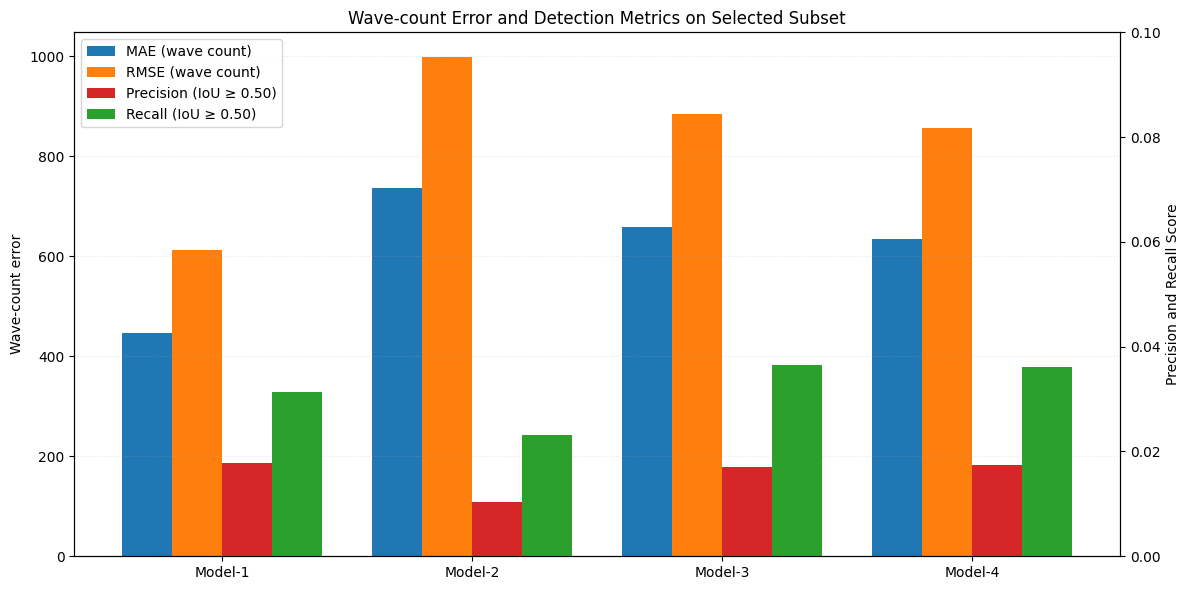

Saved plot to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_double_yaxis_colored.png


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------------------------------------------------
# DOUBLE Y-AXIS BAR PLOT (COLORED PRECISION / RECALL)
# ---------------------------------------------------------
x = np.arange(len(summary_df))
width = 0.2

fig, ax_left = plt.subplots(figsize=(12, 6))

# ---- LEFT Y-AXIS: MAE & RMSE (default colors) ----
ax_left.bar(
    x - 1.5 * width,
    summary_df["MAE_wave_count"],
    width=width,
    label="MAE (wave count)",
)
ax_left.bar(
    x - 0.5 * width,
    summary_df["RMSE_wave_count"],
    width=width,
    label="RMSE (wave count)",
)

ax_left.set_ylabel("Wave-count error")
ax_left.grid(axis="y", alpha=0.3, linestyle=":")

# ---- RIGHT Y-AXIS: Precision & Recall (custom colors) ----
ax_right = ax_left.twinx()

ax_right.bar(
    x + 0.5 * width,
    summary_df["precision_iou>=0.50"],
    width=width,
    label="Precision (IoU ≥ 0.50)",
    color="tab:red",
)
ax_right.bar(
    x + 1.5 * width,
    summary_df["recall_iou>=0.50"],
    width=width,
    label="Recall (IoU ≥ 0.50)",
    color="tab:green",
)

ax_right.set_ylabel("Precision and Recall Score")
ax_right.set_ylim(0, 0.1)

# ---- X AXIS ----
plt.xticks(x, summary_df.model_reference, rotation=0)

# ---- TITLE ----
plt.title("Wave-count Error and Detection Metrics on Selected Subset")

# ---- COMBINED LEGEND ----
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()

ax_left.legend(
    handles_left + handles_right,
    labels_left + labels_right,
    loc="upper left",
)

plt.tight_layout()

save_plot = os.path.join(
    destination_folder_model_results,
    "model_comparison_metrics_double_yaxis_colored.png"
)
plt.savefig(save_plot, dpi=300)
plt.show()

print("Saved plot to:", save_plot)



# Additional Calculating Precision / Recall / mAP50 and mAP50-90 with YOLO validation

In [62]:
# helper functions to measure overlapping and duplication of bounding boxes

def mean_pairwise_iou(boxes):
    if len(boxes) < 2:
        return 0.0
    ious = []
    for i in range(len(boxes)):
        for j in range(i + 1, len(boxes)):
            ious.append(compute_iou(boxes[i], boxes[j]))
    return float(np.mean(ious)) if ious else 0.0


def duplicate_ratio(boxes, thr=0.5):
    if len(boxes) < 2:
        return 0.0
    dup = 0
    for i in range(len(boxes)):
        for j in range(i + 1, len(boxes)):
            if compute_iou(boxes[i], boxes[j]) >= thr:
                dup += 1
                break
    return dup / len(boxes)

In [63]:
# add a new function with not excluding GT images with zero labels (as YOLO includes them as well)

def evaluate_on_subset_incl_zeroGT(
    model_path,
    image_paths,
    wave_class_id: int = 0,
    iou_thr: float = 0.5,          # GT-matching IoU
    conf_thr: float = CONF_THR,    # inference conf
    iou_nms: float = IOU_NMS,      # NMS IoU
    imgsz = IMG_SIZE,
    max_det: int = MAX_DET,
):
    """
    Evaluate one model on a subset of images.

    Returns:
      df      : per-image statistics
      metrics : dict with
                - MAE_wave_count
                - RMSE_wave_count
                - precision_iou>=X
                - recall_iou>=X
                - TP / FP / FN
                - image counts
    """

    model = YOLO(model_path)

    rows = []

    total_tp = total_fp = total_fn = 0
    n_images_total = 0
    n_images_with_gt = 0
    n_images_no_gt = 0

    for img_path in tqdm(image_paths, desc=f"Images ({Path(model_path).name})", leave=False):
        img_path = Path(img_path)
        n_images_total += 1

        if not img_path.exists():
            print(f"⚠️ Image not found (skipping): {img_path}")
            continue

        # -------------------------------------------------
        # Load ground truth
        # -------------------------------------------------
        label_path = yolo_label_path_from_image(img_path)
        gt_norm_boxes = load_gt_boxes(label_path, wave_class_id=wave_class_id)

        with Image.open(img_path) as im:
            w, h = im.size

        if len(gt_norm_boxes) == 0:
            gt_boxes = []
            n_gt = 0
            n_images_no_gt += 1
        else:
            gt_boxes = yolo_norm_to_xyxy(gt_norm_boxes, w, h)
            n_gt = len(gt_boxes)
            n_images_with_gt += 1

        # -------------------------------------------------
        # Run inference
        # -------------------------------------------------
        try:
            preds = model(
                str(img_path),
                device=DEVICE,
                imgsz=imgsz,
                conf=conf_thr,
                iou=iou_nms,
                max_det=max_det,
                verbose=False,
            )
        except Exception as e:
            print(f"⚠️ Inference failed on {img_path}: {e}")
            continue

        # -------------------------------------------------
        # Extract predictions (xyxy + confidence)
        # -------------------------------------------------
        pred_boxes = []
        if len(preds) > 0 and preds[0].boxes is not None:
            b = preds[0].boxes
            cls_ids = b.cls.cpu().numpy().astype(int)
            mask = (cls_ids == wave_class_id)

            if mask.any():
                xyxy = b.xyxy.cpu().numpy()[mask]
                confs = b.conf.cpu().numpy()[mask]

                # sort by confidence descending (IMPORTANT)
                order = np.argsort(-confs)
                for i in order:
                    pred_boxes.append(xyxy[i].tolist())

        n_pred = len(pred_boxes)
        count_error = n_pred - n_gt

        # -------------------------------------------------
        # overlap / redundancy metrics (prediction-only) 
        # -------------------------------------------------

        mp_iou = mean_pairwise_iou(pred_boxes)
        dup_ratio = duplicate_ratio(pred_boxes, thr=0.5)

        # -------------------------------------------------
        # Greedy matching (confidence-sorted)
        # -------------------------------------------------
        matched_gt = set()
        tp = fp = 0

        for pb in pred_boxes:
            best_iou = 0.0
            best_j = -1

            for j, gb in enumerate(gt_boxes):
                if j in matched_gt:
                    continue
                iou = compute_iou(pb, gb)
                if iou > best_iou:
                    best_iou = iou
                    best_j = j

            if best_iou >= iou_thr and best_j >= 0:
                tp += 1
                matched_gt.add(best_j)
            else:
                fp += 1

        fn = n_gt - len(matched_gt)

        total_tp += tp
        total_fp += fp
        total_fn += fn

        rows.append({
            "image": str(img_path),
            "n_gt": n_gt,
            "n_pred": n_pred,
            "count_error": count_error,
            "tp": tp,
            "fp": fp,
            "fn": fn,
            "mean_pairwise_iou": mp_iou,
            "duplicate_ratio": dup_ratio,
        })

    # -------------------------------------------------
    # Aggregate results
    # -------------------------------------------------
    df = pd.DataFrame(rows)

    if df.empty:
        metrics = {
            "MAE_wave_count": np.nan,
            "RMSE_wave_count": np.nan,
            f"precision_iou>={iou_thr:.2f}": np.nan,
            f"recall_iou>={iou_thr:.2f}": np.nan,
            "TP": 0,
            "FP": 0,
            "FN": 0,
            "n_images_total": n_images_total,
            "n_images_with_gt": n_images_with_gt,
            "n_images_no_gt": n_images_no_gt,
        }
        return df, metrics

    # --- wave count errors ---
    df["abs_error"] = df["count_error"].abs()
    mae  = df["abs_error"].mean()
    rmse = np.sqrt((df["count_error"] ** 2).mean())
    mean_mp_iou = df["mean_pairwise_iou"].mean()
    mean_dup_ratio = df["duplicate_ratio"].mean()

    # --- detection metrics ---
    precision = total_tp / (total_tp + total_fp + 1e-9)
    recall    = total_tp / (total_tp + total_fn + 1e-9)

    metrics = {
        "MAE_wave_count": mae,
        "RMSE_wave_count": rmse,
        f"precision_iou>={iou_thr:.2f}": precision,
        f"recall_iou>={iou_thr:.2f}": recall,
        "mean_pairwise_iou": mean_mp_iou,
        "duplicate_ratio": mean_dup_ratio,
        "TP": total_tp,
        "FP": total_fp,
        "FN": total_fn,
        "n_images_total": n_images_total,
        "n_images_with_gt": n_images_with_gt,
        "n_images_no_gt": n_images_no_gt,
    }

    return df, metrics


In [66]:
def write_yolo_val_list_from_paths(selected_images, out_txt):
    out_txt = Path(out_txt)
    out_txt.parent.mkdir(parents=True, exist_ok=True)

    with open(out_txt, "w", encoding="utf-8") as f:
        for p in selected_images:
            f.write(str(Path(p)) + "\n")

    print(f"✅ YOLO val list written: {out_txt} ({len(selected_images)} images)")
    return str(out_txt)

def build_yolo_yaml_from_val_list(val_list_txt, out_yaml, class_names=None):
    if class_names is None:
        class_names = ["wave"]

    out_yaml = Path(out_yaml)
    out_yaml.parent.mkdir(parents=True, exist_ok=True)

    data = {
        "path": "",                 # not required for absolute paths
        "train": val_list_txt,      # dummy but required
        "val": val_list_txt,        # ✅ ALL 3140 images
        "nc": len(class_names),
        "names": class_names
    }

    with open(out_yaml, "w", encoding="utf-8") as f:
        yaml.safe_dump(data, f, sort_keys=False)

    return str(out_yaml)

In [67]:
# =========================================================
# A) CREATE YOLO VAL LIST FROM SELECTED IMAGES
# =========================================================
yolo_val_txt = write_yolo_val_list_from_paths(
    selected_images,
    os.path.join(destination_folder_model_results, "august_val.txt")
)

data_yaml_path = build_yolo_yaml_from_val_list(
    val_list_txt=yolo_val_txt,
    out_yaml=os.path.join(destination_folder_model_results, "august_val.yaml"),
    class_names=["wave"]
)

print("✅ YOLO dataset yaml:", data_yaml_path)

✅ YOLO val list written: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\august_val.txt (3140 images)
✅ YOLO dataset yaml: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\august_val.yaml


In [68]:
# =========================================================
# 4) NEW: YOLO val interference metrics function
# =========================================================


def yolo_val_metrics(model_path, data_yaml_path, device=DEVICE, imgsz=IMG_SIZE,
                     conf=CONF_THR, iou=IOU_NMS, max_det=MAX_DET):
    model = YOLO(model_path)
    imgsz_arg = list(imgsz) if isinstance(imgsz, (tuple, list)) else imgsz

    r = model.val(
        data=data_yaml_path,
        device=device,
        imgsz=imgsz_arg,
        conf=conf,
        iou=iou,
        max_det=max_det,
        cache=False,          # ✅ IMPORTANT: prevents old cache limiting images
        verbose=False
    )

    box = getattr(r, "box", None)
    return {
        "yolo_precision": float(getattr(box, "p", np.nan)) if box else np.nan,
        "yolo_recall": float(getattr(box, "r", np.nan)) if box else np.nan,
        "yolo_mAP50": float(getattr(box, "map50", np.nan)) if box else np.nan,
        "yolo_mAP50-95": float(getattr(box, "map", np.nan)) if box else np.nan,
    }

In [53]:
# =========================================================
# 5) RUN: all 4 models → MAE/RMSE + YOUR P/R + YOLO P/R/mAP
# =========================================================
models_to_compare = {
    "yolov8n_1000_50e":  yolo8v_N_1000_50,
    "yolov8n_1000_150e": yolo8v_N_1000_150,
    "yolov8s_1000_150e": yolo8v_S_1000_150,
    "yolov8s_5000_150e": yolo8v_S_5000_150,
}

all_metrics_with_yolo = []

model_items = list(models_to_compare.items())

print("Images in selected_images:", len(selected_images))
print("Images in august_val.txt:", sum(1 for _ in open(yolo_val_txt)))

for short_name, mpath in tqdm(model_items, desc="Models", total=len(model_items)):
    print(f"\n=== August evaluation: {short_name} ===")
    t0 = time.time()

    # A) Your custom evaluation (MAE/RMSE + your fixed-threshold P/R)
    df_eval, metrics_custom = evaluate_on_subset_incl_zeroGT(
        model_path=mpath,
        image_paths=selected_images,
        wave_class_id=0,
        iou_thr=0.5,
        conf_thr=CONF_THR,
        iou_nms=IOU_NMS,
        imgsz=IMG_SIZE,
        max_det=MAX_DET,
    )

    per_image_csv = os.path.join(destination_folder_model_results, f"selected_eval_{short_name}_with_zeroGT.csv")
    df_eval.to_csv(per_image_csv, index=False)
    print("Saved per-image stats →", per_image_csv)

    # B) YOLO-native validation (precision/recall/mAP50/mAP50-95)
    metrics_yolo = yolo_val_metrics(
        model_path=mpath,
        data_yaml_path=data_yaml_path,
        device=DEVICE,
        imgsz=2048,
        conf=CONF_THR,
        iou=IOU_NMS,
        max_det=MAX_DET
    )

    # Combine
    combined = {
        "model_name": short_name,
        "model_path": str(mpath),
        **metrics_custom,
        **metrics_yolo,
        "runtime_sec": round(time.time() - t0, 2),
    }
    all_metrics_with_yolo.append(combined)

# Summary
withyolo_summary_df = pd.DataFrame(all_metrics_with_yolo).set_index("model_name")
print("\n=== Combined metrics (custom + YOLO) ===")
display(withyolo_summary_df)

withyolo_summary_csv = os.path.join(destination_folder_model_results, "model_comparison_august_combined_metrics.csv")
withyolo_summary_df.to_csv(withyolo_summary_csv)
print("Saved summary →", withyolo_summary_csv)

✅ YOLO validation dataset yaml: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\august_selected_data.yaml


Models:   0%|                                                                                    | 0/4 [00:00<?, ?it/s]


=== August evaluation: yolov8n_1000_50e ===



ges (02_waves_yolov8n-1000_50e.pt): 100%|█████████████████████████████████████| 3140/3140 [1:50:18<00:00,  1.56s/it]
                                                                                                                    

Saved per-image stats → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8n_1000_50e.csv
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 189.333.5 MB/s, size: 2218.8 KB)



4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\
4mval: Scanning C:\User

val: New cache created: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\val.cache



              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:05
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:07
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:13
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:17
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [00:19
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [00:22
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   4%|▎         | 7/197 [00:22
              Class     Images  Instances      Box(P          R

                   all       3140    1696231     0.0171     0.0315      0.014     0.0028
Speed: 1.6ms preprocess, 34.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\val53


C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box is not None else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box is not None else np.nan,
Models:  25%|█████████████████▌                                                    | 1/4 [1:56:13<5:48:39, 6973.24s/it]


=== August evaluation: yolov8n_1000_150e ===



ges (02_waves_yolov8n-1000_150e.pt): 100%|████████████████████████████████████| 3140/3140 [2:22:52<00:00,  2.03s/it]
                                                                                                                    

Saved per-image stats → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8n_1000_150e.csv
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1224.4500.3 MB/s, size: 2139.1 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:07
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:09
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:15
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:17
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [00:20
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [00:23
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0106     0.0237    0.00616    0.00147
Speed: 1.6ms preprocess, 33.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs\detect\val54


C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box is not None else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box is not None else np.nan,
Models:  50%|███████████████████████████████████                                   | 2/4 [4:25:13<4:31:00, 8130.18s/it]


=== August evaluation: yolov8s_1000_150e ===



ges (03_waves_yolov8s-1000_150e.pt): 100%|████████████████████████████████████| 3140/3140 [2:56:16<00:00,  2.96s/it]
                                                                                                                    

Saved per-image stats → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8s_1000_150e.csv
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1555.5616.6 MB/s, size: 2279.0 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:12
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:20
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:30
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:38
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [00:45
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [00:54
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0171     0.0376     0.0117    0.00346
Speed: 1.6ms preprocess, 439.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\val55


C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box is not None else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box is not None else np.nan,
Models:  75%|████████████████████████████████████████████████████▌                 | 3/4 [7:47:41<2:46:04, 9964.97s/it]


=== August evaluation: yolov8s_5000_150e ===



ges (04_waves_yolov8s-5000_150e.pt): 100%|████████████████████████████████████| 3140/3140 [2:19:31<00:00,  1.90s/it]
                                                                                                                    

Saved per-image stats → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\selected_eval_yolov8s_5000_150e.csv
WARNING updating to 'imgsz=2048'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1400.4659.3 MB/s, size: 2525.2 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\temp_august_selected_dataset\labels\

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:12
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:20
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:29
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:38
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [00:46
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [00:54
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0186     0.0393     0.0124    0.00295
Speed: 1.6ms preprocess, 440.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\val56


C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box is not None else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\2726536919.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box is not None else np.nan,
Models: 100%|███████████████████████████████████████████████████████████████████████| 4/4 [10:33:27<00:00, 9501.82s/it]


=== Combined August metrics (custom + YOLO) ===


model_path  \
model_name                                                             
yolov8n_1000_50e   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8n_1000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8s_1000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8s_5000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   

                   MAE_wave_count  RMSE_wave_count  precision_iou>=0.50  \
model_name                                                                
yolov8n_1000_50e       425.043312       598.117963             0.017730   
yolov8n_1000_150e      701.987580       973.809521             0.010425   
yolov8s_1000_150e      627.594268       863.857528             0.017003   
yolov8s_5000_150e      604.380255       836.207413             0.017429   

                   recall_iou>=0.50  mean_pairwise_iou  duplicate_ratio  \
model_name                                                                
yolov8n_1000_50e           0.031312           0.004684         0.045850   
yolov8n_1000_150e          0.023062           0.003040         0.031044   
yolov8s_1000_150e          0.036425           0.006373         0.048229   
yolov8s_5000_150e          0.036141           0.004239         0.034651   

                      TP       FP       FN  n_images_total  n_images_with_gt  \
model_name                                                                     
yolov8n_1000_50e   53112  2942561  1643119            3140              2989   
yolov8n_1000_150e  39118  3713360  1657113            3140              2989   
yolov8s_1000_150e  61786  3572085  1634445            3140              2989   
yolov8s_5000_150e  61303  3456008  1634928            3140              2989   

                   n_images_no_gt  yolo_precision  yolo_recall  yolo_mAP50  \
model_name                                                                   
yolov8n_1000_50e              151        0.017098     0.031499    0.014043   
yolov8n_1000_150e             151        0.010575     0.023730    0.006160   
yolov8s_1000_150e             151        0.017053     0.037629    0.011662   
yolov8s_5000_150e             151        0.018611     0.039276    0.012361   

                   yolo_mAP50-95  runtime_sec  
model_name                                     
yolov8n_1000_50e        0.002799      6973.24  
yolov8n_1000_150e       0.001471      8940.05  
yolov8s_1000_150e       0.003455     12148.36  
yolov8s_5000_150e       0.002951      9945.64

Saved summary → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_august_combined_metrics.csv


In [55]:
withyolo_summary_csv = os.path.join(
    destination_folder_model_results,
    "model_comparison_august_combined_metrics.csv"
)

withyolo_summary_csv = pd.read_csv(withyolo_summary_csv, index_col=0)

In [57]:
withyolo_summary_csv["model_reference"] = withyolo_summary_csv.index.map(model_reference_map)

withyolo_summary_csv.head()

model_path  \
model_name                                                             
yolov8n_1000_50e   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8n_1000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8s_1000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8s_5000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   

                   MAE_wave_count  RMSE_wave_count  precision_iou>=0.50  \
model_name                                                                
yolov8n_1000_50e       425.043312       598.117963             0.017730   
yolov8n_1000_150e      701.987580       973.809521             0.010425   
yolov8s_1000_150e      627.594268       863.857528             0.017003   
yolov8s_5000_150e      604.380255       836.207413             0.017429   

                   recall_iou>=0.50  mean_pairwise_iou  duplicate_ratio  \
model_name                                                                
yolov8n_1000_50e           0.031312           0.004684         0.045850   
yolov8n_1000_150e          0.023062           0.003040         0.031044   
yolov8s_1000_150e          0.036425           0.006373         0.048229   
yolov8s_5000_150e          0.036141           0.004239         0.034651   

                      TP       FP       FN  n_images_total  n_images_with_gt  \
model_name                                                                     
yolov8n_1000_50e   53112  2942561  1643119            3140              2989   
yolov8n_1000_150e  39118  3713360  1657113            3140              2989   
yolov8s_1000_150e  61786  3572085  1634445            3140              2989   
yolov8s_5000_150e  61303  3456008  1634928            3140              2989   

                   n_images_no_gt  yolo_precision  yolo_recall  yolo_mAP50  \
model_name                                                                   
yolov8n_1000_50e              151        0.017098     0.031499    0.014043   
yolov8n_1000_150e             151        0.010575     0.023730    0.006160   
yolov8s_1000_150e             151        0.017053     0.037629    0.011662   
yolov8s_5000_150e             151        0.018611     0.039276    0.012361   

                   yolo_mAP50-95  runtime_sec model_reference  
model_name                                                     
yolov8n_1000_50e        0.002799      6973.24         Model-1  
yolov8n_1000_150e       0.001471      8940.05         Model-2  
yolov8s_1000_150e       0.003455     12148.36         Model-3  
yolov8s_5000_150e       0.002951      9945.64         Model-4

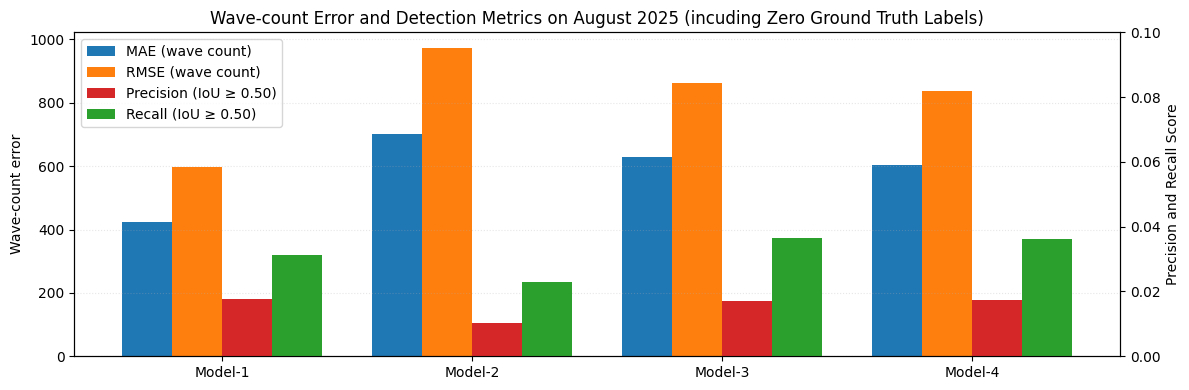

Saved plot to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_double_yaxis_colored_with_zeroGT.png


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------------------------------------------------
# DOUBLE Y-AXIS BAR PLOT (COLORED PRECISION / RECALL)
# ---------------------------------------------------------
x = np.arange(len(withyolo_summary_csv))
width = 0.2

fig, ax_left = plt.subplots(figsize=(12, 4))

# ---- LEFT Y-AXIS: MAE & RMSE (default colors) ----
ax_left.bar(
    x - 1.5 * width,
    withyolo_summary_csv["MAE_wave_count"],
    width=width,
    label="MAE (wave count)",
)
ax_left.bar(
    x - 0.5 * width,
    withyolo_summary_csv["RMSE_wave_count"],
    width=width,
    label="RMSE (wave count)",
)

ax_left.set_ylabel("Wave-count error")
ax_left.grid(axis="y", alpha=0.3, linestyle=":")

# ---- RIGHT Y-AXIS: Precision & Recall (custom colors) ----
ax_right = ax_left.twinx()

ax_right.bar(
    x + 0.5 * width,
    withyolo_summary_csv["precision_iou>=0.50"],
    width=width,
    label="Precision (IoU ≥ 0.50)",
    color="tab:red",
)
ax_right.bar(
    x + 1.5 * width,
    withyolo_summary_csv["recall_iou>=0.50"],
    width=width,
    label="Recall (IoU ≥ 0.50)",
    color="tab:green",
)

ax_right.set_ylabel("Precision and Recall Score")
ax_right.set_ylim(0, 0.1)

# ---- X AXIS ----
plt.xticks(x, withyolo_summary_csv.model_reference, rotation=0)

# ---- TITLE ----
plt.title("Wave-count Error and Detection Metrics on August 2025 (incuding Zero Ground Truth Labels)")

# ---- COMBINED LEGEND ----
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()

ax_left.legend(
    handles_left + handles_right,
    labels_left + labels_right,
    loc="upper left",
)

plt.tight_layout()

save_plot = os.path.join(
    destination_folder_model_results,
    "model_comparison_metrics_double_yaxis_colored_with_zeroGT.png"
)
plt.savefig(save_plot, dpi=300)
plt.show()

print("Saved plot to:", save_plot)

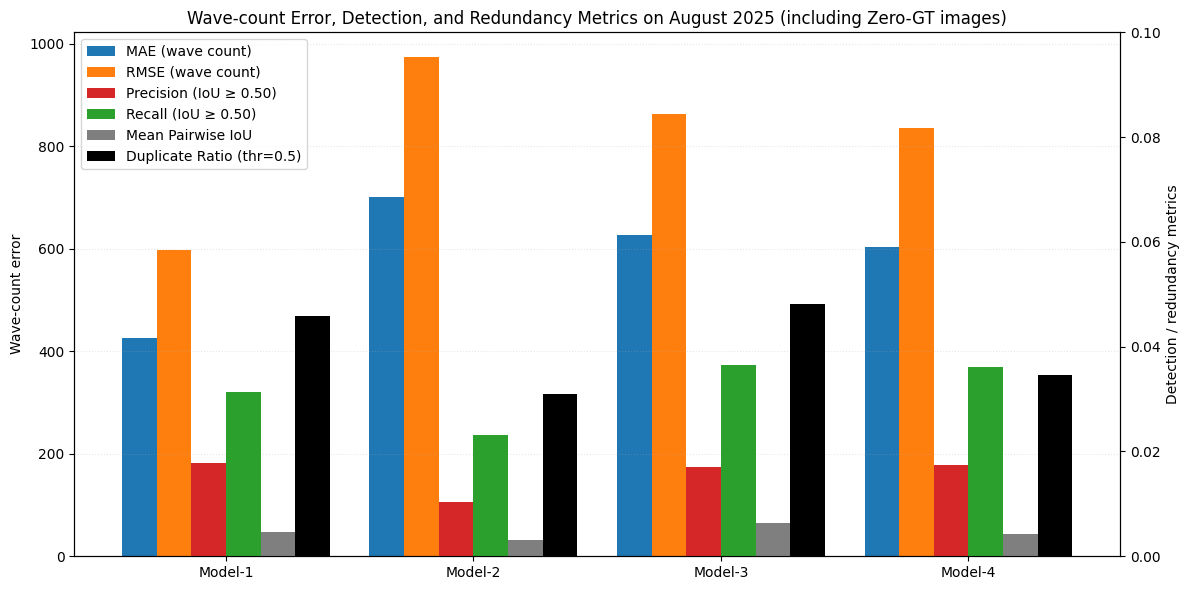

Saved plot to: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_metrics_double_yaxis_colored_with_zeroGT_plus_overlap.png


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ---------------------------------------------------------
# DOUBLE Y-AXIS BAR PLOT (+ mean_pairwise_iou + duplicate_ratio)
# ---------------------------------------------------------
x = np.arange(len(withyolo_summary_csv))
width = 0.14  # smaller because we plot more bars

fig, ax_left = plt.subplots(figsize=(12, 6))

# ---- LEFT Y-AXIS: MAE & RMSE ----
ax_left.bar(
    x - 2.5 * width,
    withyolo_summary_csv["MAE_wave_count"],
    width=width,
    label="MAE (wave count)",
)
ax_left.bar(
    x - 1.5 * width,
    withyolo_summary_csv["RMSE_wave_count"],
    width=width,
    label="RMSE (wave count)",
)

ax_left.set_ylabel("Wave-count error")
ax_left.grid(axis="y", alpha=0.3, linestyle=":")

# ---- RIGHT Y-AXIS: Precision / Recall / Pairwise IoU / Duplicate Ratio ----
ax_right = ax_left.twinx()

ax_right.bar(
    x - 0.5 * width,
    withyolo_summary_csv["precision_iou>=0.50"],
    width=width,
    label="Precision (IoU ≥ 0.50)",
    color="tab:red",
)
ax_right.bar(
    x + 0.5 * width,
    withyolo_summary_csv["recall_iou>=0.50"],
    width=width,
    label="Recall (IoU ≥ 0.50)",
    color="tab:green",
)

# NEW: grey + black bars
ax_right.bar(
    x + 1.5 * width,
    withyolo_summary_csv["mean_pairwise_iou"],
    width=width,
    label="Mean Pairwise IoU",
    color="tab:gray",
)
ax_right.bar(
    x + 2.5 * width,
    withyolo_summary_csv["duplicate_ratio"],
    width=width,
    label="Duplicate Ratio (thr=0.5)",
    color="black",
)

ax_right.set_ylabel("Detection / redundancy metrics")
ax_right.set_ylim(0, 0.1)  # adjust if you want

# ---- X AXIS ----
plt.xticks(x, withyolo_summary_csv["model_reference"], rotation=0)

# ---- TITLE ----
plt.title("Wave-count Error, Detection, and Redundancy Metrics on August 2025 (including Zero-GT images)")

# ---- COMBINED LEGEND ----
handles_left, labels_left = ax_left.get_legend_handles_labels()
handles_right, labels_right = ax_right.get_legend_handles_labels()

ax_left.legend(
    handles_left + handles_right,
    labels_left + labels_right,
    loc="upper left",
)

plt.tight_layout()

save_plot = os.path.join(
    destination_folder_model_results,
    "model_comparison_metrics_double_yaxis_colored_with_zeroGT_plus_overlap.png"
)
plt.savefig(save_plot, dpi=300)
plt.show()

print("Saved plot to:", save_plot)

In [75]:
# rerun yolo validation given it had the wrong image pahs first. keep custom pipeline results with including zero GT.

# 1) Load your old combined summary (custom ok, yolo wrong)
old_csv = os.path.join(destination_folder_model_results, "model_comparison_august_combined_metrics.csv")
df_old = pd.read_csv(old_csv)

# Be robust: ensure index column exists
if "model_name" in df_old.columns:
    df_old = df_old.set_index("model_name")
else:
    # if your CSV already saved model_name as index, pandas might read it as "Unnamed: 0"
    if "Unnamed: 0" in df_old.columns:
        df_old = df_old.set_index("Unnamed: 0")
        df_old.index.name = "model_name"

print("✅ Loaded old summary:", old_csv)
print("Rows:", len(df_old))


✅ Loaded old summary: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_august_combined_metrics.csv
Rows: 4


In [76]:
# 2) Rerun YOLO val for each model and overwrite yolo_* columns
for short_name, mpath in tqdm(list(models_to_compare.items()), desc="YOLO val (fix)"):
    if short_name not in df_old.index:
        print(f"⚠️ Model not found in old summary (skipping): {short_name}")
        continue
        
    print(f"\n🧠 YOLO VAL now: {short_name}  |  weights: {mpath}")
    
    t0 = time.time()

    metrics_yolo = yolo_val_metrics(
        model_path=mpath,
        data_yaml_path=data_yaml_path,
        device=DEVICE,
        imgsz=2048,        # YOLO val needs int
        conf=CONF_THR,
        iou=IOU_NMS,
        max_det=MAX_DET
    )

    # overwrite (or create) the yolo columns
    for k, v in metrics_yolo.items():
        df_old.loc[short_name, k] = v

    df_old.loc[short_name, "runtime_sec_yolo_val_only"] = round(time.time() - t0, 2)

# 3) Save fixed combined summary
new_yolo_zeroGT_csv = os.path.join(
    destination_folder_model_results,
    "model_comparison_august_combined_metrics_FIXED.csv"
)

df_old.to_csv(new_yolo_zeroGT_csv, index=True)  # or index=False if you don't want the index saved
print("✅ Saved FIXED summary →", new_yolo_zeroGT_csv)

YOLO val (fix):   0%|                                                                            | 0/4 [00:00<?, ?it/s]


🧠 YOLO VAL now: yolov8n_1000_50e  |  weights: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\img_labeling\02_waves_yolov8n-1000_50e.pt
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1527.2655.4 MB/s, size: 2095.2 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 3140 images, 151 backgrounds, 0 corrup

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:08
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:14
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:17
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:20
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [00:23
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [00:25
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0171     0.0315      0.014     0.0028
Speed: 1.8ms preprocess, 45.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs\detect\val64


C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box else np.nan,
YOLO val (fix):  25%|████████████████▊                                                  | 1/4 [06:38<19:56, 398.92s/it]


🧠 YOLO VAL now: yolov8n_1000_150e  |  weights: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\img_labeling\02_waves_yolov8n-1000_150e.pt
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1107.9448.3 MB/s, size: 1739.2 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 3140 images, 151 backgrounds, 0 corrup

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:06
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:12
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:16
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:19
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [00:22
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [00:25
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0106     0.0237    0.00616    0.00147
Speed: 1.8ms preprocess, 46.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs\detect\val65


C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box else np.nan,
YOLO val (fix):  50%|█████████████████████████████████▌                                 | 2/4 [13:20<13:21, 400.76s/it]


🧠 YOLO VAL now: yolov8s_1000_150e  |  weights: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\img_labeling\03_waves_yolov8s-1000_150e.pt
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1297.8580.6 MB/s, size: 2170.5 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 3140 images, 151 backgrounds, 0 corrup

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:14
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:26
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:39
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:51
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [01:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [01:11
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0171     0.0376     0.0117    0.00346
Speed: 1.8ms preprocess, 569.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\val66


C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box else np.nan,
YOLO val (fix):  75%|█████████████████████████████████████████████████▌                | 3/4 [46:52<18:56, 1136.19s/it]


🧠 YOLO VAL now: yolov8s_5000_150e  |  weights: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\img_labeling\04_waves_yolov8s-5000_150e.pt
Ultralytics 8.3.168  Python-3.9.21 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1026.2399.3 MB/s, size: 2009.9 KB)



val: Scanning C:\Users\A\Documents\XX_GitHub_Repo\data-waves\idx_images.cache... 3140 images, 151 backgrounds, 0 corrup

              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/197 [00:00
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 1/197 [00:16
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 2/197 [00:28
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 3/197 [00:40
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 4/197 [00:53
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 5/197 [01:02
              Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 6/197 [01:13
              Class     Images  Instances      Box(P       

                   all       3140    1696231     0.0186     0.0393     0.0124    0.00295
Speed: 1.7ms preprocess, 557.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\val67


C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_precision": float(getattr(box, "p", np.nan)) if box else np.nan,
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1245060362.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "yolo_recall": float(getattr(box, "r", np.nan)) if box else np.nan,
YOLO val (fix): 100%|████████████████████████████████████████████████████████████████| 4/4 [1:19:15<00:00, 1188.97s/it]

✅ Saved FIXED summary → C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\model_comparison_august_combined_metrics_FIXED.csv


In [79]:
withyolo_summary_csv = os.path.join(
    destination_folder_model_results,
    "model_comparison_august_combined_metrics_FIXED.csv"
)

withyolo_summary_csv = pd.read_csv(withyolo_summary_csv, index_col=0)

In [80]:
withyolo_summary_csv["model_reference"] = withyolo_summary_csv.index.map(model_reference_map)

withyolo_summary_csv.head()

model_path  \
model_name                                                             
yolov8n_1000_50e   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8n_1000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8s_1000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   
yolov8s_5000_150e  C:\Users\A\Documents\XX_GitHub_Repo\data-waves...   

                   MAE_wave_count  RMSE_wave_count  precision_iou>=0.50  \
model_name                                                                
yolov8n_1000_50e       425.043312       598.117963             0.017730   
yolov8n_1000_150e      701.987580       973.809521             0.010425   
yolov8s_1000_150e      627.594268       863.857528             0.017003   
yolov8s_5000_150e      604.380255       836.207413             0.017429   

                   recall_iou>=0.50  mean_pairwise_iou  duplicate_ratio  \
model_name                                                                
yolov8n_1000_50e           0.031312           0.004684         0.045850   
yolov8n_1000_150e          0.023062           0.003040         0.031044   
yolov8s_1000_150e          0.036425           0.006373         0.048229   
yolov8s_5000_150e          0.036141           0.004239         0.034651   

                      TP       FP       FN  n_images_total  n_images_with_gt  \
model_name                                                                     
yolov8n_1000_50e   53112  2942561  1643119            3140              2989   
yolov8n_1000_150e  39118  3713360  1657113            3140              2989   
yolov8s_1000_150e  61786  3572085  1634445            3140              2989   
yolov8s_5000_150e  61303  3456008  1634928            3140              2989   

                   n_images_no_gt  yolo_precision  yolo_recall  yolo_mAP50  \
model_name                                                                   
yolov8n_1000_50e              151        0.017098     0.031499    0.014043   
yolov8n_1000_150e             151        0.010575     0.023730    0.006160   
yolov8s_1000_150e             151        0.017053     0.037629    0.011662   
yolov8s_5000_150e             151        0.018611     0.039276    0.012361   

                   yolo_mAP50-95  runtime_sec  runtime_sec_yolo_val_only  \
model_name                                                                 
yolov8n_1000_50e        0.002799      6973.24                     398.92   
yolov8n_1000_150e       0.001471      8940.05                     402.04   
yolov8s_1000_150e       0.003455     12148.36                    2011.34   
yolov8s_5000_150e       0.002951      9945.64                    1943.55   

                  model_reference  
model_name                         
yolov8n_1000_50e          Model-1  
yolov8n_1000_150e         Model-2  
yolov8s_1000_150e         Model-3  
yolov8s_5000_150e         Model-4

# Calculation of Correlation Wind Observations and Hs and Hmax

In [ ]:
import pandas as pd
import mikeio
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
# user selected date

#DATE ="2025-08-09"
#DATE ="2025-08-24"
DATE ="2025-10-23"

In [ ]:
# --- Configuration ---
# List of your wind observation CSV files
# Add your Thun file here if available (e.g., '2025-10-23_THU_wind-speed-dir_obs.csv')
wind_files = [
    f"{DATE}_FRU_wind-speed-dir_obs.csv",
    f"{DATE}_THU_wind-speed-dir_obs.csv",
    f"{DATE}_INT_wind-speed-dir_obs.csv"
]

# List of your model result DFS0 files
model_files = [
    f"{DATE}_yolov8n-1000_50e_results.dfs0",
    f"{DATE}_yolov8n-1000_150e_results.dfs0",
    f"{DATE}_yolov8s-1000_150e_results.dfs0",
    f"{DATE}_yolov8s-5000_150e_results.dfs0"
]

# --- Configuration for Model Names ---
# I adjusted the keys slightly to match your filenames (which use hyphens like '1000-50e')
model_reference_map = {
    "yolov8n-1000_50e": "Model-1",
    "yolov8n-1000_150e": "Model-2",
    "yolov8s-1000_150e": "Model-3",
    "yolov8s-5000_150e": "Model-4"
}

# Output directory for plots (optional)
corr_folder_name = f"correlation_plots"
output_dir = os.path.join(source_folder_mike21sw, corr_folder_name)
os.makedirs(output_dir, exist_ok=True)

# Create full paths for wind files
wind_files = [os.path.join(source_folder_mike21sw, f) for f in wind_files]

# Create full paths for model files
model_files = [os.path.join(source_folder_mike21sw, f) for f in model_files]

In [ ]:
# --- Step 1: Load and Prepare Wind Data ---
print("Loading wind observation data...")
wind_dfs = []

for file_path in wind_files:
    if os.path.exists(file_path):
        # Read CSV
        df = pd.read_csv(file_path)
        
        # Parse timestamp
        df['time'] = pd.to_datetime(df['tz_local'])
        df = df.set_index('time')
        
        # Identify station (FRU, INT, THU) from filename or column
        # Assuming filename format is "Date_STATION_..."
        station_code = os.path.basename(file_path).split('_')[1] 
        
        # Rename columns to include station code
        df = df[['wind_speed_ms', 'wind_dir_deg']].rename(columns={
            'wind_speed_ms': f'WindSpd_{station_code}',
            'wind_dir_deg': f'WindDir_{station_code}'
        })
        
        wind_dfs.append(df)
    else:
        print(f"Warning: Wind file not found: {file_path}")

if not wind_dfs:
    raise FileNotFoundError("No wind data files found.")

# Combine all wind stations into one dataframe (merges on time index)
wind_data = pd.concat(wind_dfs, axis=1, join='outer')

# Ensure wind data is sorted by time
wind_data = wind_data.sort_index()

# Handle potential duplicate times if any
wind_data = wind_data.groupby(wind_data.index).first()



In [ ]:
# --- Step 2: Process Each Model ---
for model_file in model_files:
    if not os.path.exists(model_file):
        print(f"Skipping missing model file: {model_file}")
        continue
        
    # 1. Determine the Model Reference Name
    filename = os.path.basename(model_file)
    model_ref = filename # Default to filename if no match found
    
    # Check which key is inside the filename
    for key, pretty_name in model_reference_map.items():
        if key in filename:
            model_ref = pretty_name
            break
    
    print(f"\nProcessing: {model_ref} (File: {filename})")
    
    # 2. Read DFS0 file
    ds = mikeio.read(model_file)
    df_model = ds.to_dataframe()
    
    # Add the requested reference column
    df_model["model_reference"] = model_ref
    
    # Ensure index is datetime and naive
    if df_model.index.tz is not None:
         df_model.index = df_model.index.tz_localize(None)
    
    # --- Step 3: Merge Wind and Wave Data ---
    merged_df = pd.merge(wind_data, df_model, left_index=True, right_index=True, how='inner')
    
    if merged_df.empty:
        print("No overlapping timestamps found.")
        continue
    
    # --- Step 4: Correlation Matrix (FILTERED) ---
    
    # Define columns to keep: Only 'WindSpd' and Wave Heights. 
    # This filters out 'WindDir', 'U', 'V', etc.
    cols_to_corr = [
        c for c in merged_df.columns 
        if "WindSpd" in c 
        or "Significant Wave Height" in c 
        or "Max Wave Height" in c
    ]
    
    # Calculate correlation only on these columns
    corr_matrix = merged_df[cols_to_corr].corr()
    
    # Create safe filename string (replace spaces/dashes with underscores)
    safe_model_name = model_ref.replace(" – ", "_").replace("–", "-").replace(" ", "_")
    
    # Plot Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix\n{model_ref}') # Uses nice name
    plt.tight_layout()
    
    # Save with nice name
    plot_filename = os.path.join(output_dir, f'CorrMatrix_{safe_model_name}.png')
    plt.savefig(plot_filename)
    print(f"Saved: {plot_filename}")
    plt.show()
    
    # --- Step 5: Scatter Plots ---
    wave_cols = [c for c in df_model.columns if "Significant Wave Height" in c or "Max Wave Height" in c]
    wind_spd_cols = [c for c in wind_data.columns if "WindSpd" in c]
    
    for wave_col in wave_cols:
        for wind_col in wind_spd_cols:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=merged_df, x=wind_col, y=wave_col)
            
            # Regression line
            sns.regplot(data=merged_df, x=wind_col, y=wave_col, scatter=False, color='red')
            
            plt.title(f'{wave_col} vs {wind_col}\n{model_ref}') # Uses nice name
            plt.xlabel(f'{wind_col} (m/s)')
            plt.ylabel(f'{wave_col} (m)')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            
            # Clean up column names for filename (e.g., "Significant Wave Height" -> "SigWave")
            short_wave = "Hs" if "Significant" in wave_col else "Hmax"
            
            scatter_filename = os.path.join(output_dir, f'Scatter_{wind_col}_vs_{short_wave}_{safe_model_name}.png')
            plt.savefig(scatter_filename)
            plt.show()

In [ ]:
# --- Step 6: Create Aggregated Correlation Matrices (All Models + All Winds) ---
print("\nGenerating aggregated correlation matrices...")

# 1. Initialize the big dataframe with the wind data
big_df = wind_data.copy()

# 2. Iterate through all models and merge them into 'big_df'
for model_file in model_files:
    if not os.path.exists(model_file):
        continue
        
    # Determine Model Name from your map
    filename = os.path.basename(model_file)
    model_ref = filename
    for key, pretty_name in model_reference_map.items():
        if key in filename:
            model_ref = pretty_name 
            break
            
    # Load Data
    ds = mikeio.read(model_file)
    df_model = ds.to_dataframe()
    
    # Fix Index
    if df_model.index.tz is not None:
         df_model.index = df_model.index.tz_localize(None)
    
    # Rename columns to be unique for the big dataframe
    # We look for "Significant Wave Height" and "Max Wave Height"
    
    # 2a. Handle Hs
    hs_col = [c for c in df_model.columns if "Significant Wave Height" in c]
    if hs_col:
        big_df = pd.merge(big_df, df_model[hs_col].rename(columns={hs_col[0]: f"Hs [{model_ref}]"}),
                          left_index=True, right_index=True, how='inner')

    # 2b. Handle Hmax
    hmax_col = [c for c in df_model.columns if "Max Wave Height" in c]
    if hmax_col:
        big_df = pd.merge(big_df, df_model[hmax_col].rename(columns={hmax_col[0]: f"Hmax [{model_ref}]"}),
                          left_index=True, right_index=True, how='inner')

# --- Plot 1: Significant Wave Height (Hs) vs All Winds ---
cols_hs = [c for c in big_df.columns if "WindSpd" in c or "Hs [" in c]
corr_matrix_hs = big_df[cols_hs].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_hs, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f"Aggregated Correlation Matrix: Significant Wave Height (Hs)\nAll Wind Stations vs. All Models\n{DATE}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

filename_hs = os.path.join(output_dir, f"{DATE}_Hs_CorrMatrix_AGGREGATED_AllModels.png")
plt.savefig(filename_hs)
print(f"Saved Hs matrix to {filename_hs}")
plt.show()

# --- Plot 2: Max Wave Height (Hmax) vs All Winds ---
cols_hmax = [c for c in big_df.columns if "WindSpd" in c or "Hmax [" in c]
corr_matrix_hmax = big_df[cols_hmax].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_hmax, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f"Aggregated Correlation Matrix: Max Wave Height (Hmax)\nAll Wind Stations vs. All Models\n{DATE}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

filename_hmax = os.path.join(output_dir, f"{DATE}_Hmax_CorrMatrix_AGGREGATED_AllModels.png")
plt.savefig(filename_hmax)
print(f"Saved Hmax matrix to {filename_hmax}")
plt.show()

In [ ]:

# --- Step 7: Day vs Night Correlation Analysis (4-Panel Plot) ---
print("\nGenerating Day vs Night correlation analysis...")

# 1. Define Time Filters
# Day: 06:00 to 19:59 (Hours 6 to 19 inclusive)
mask_day = (big_df.index.hour >= 6) & (big_df.index.hour <= 19)

# Night: 20:00 to 05:59 (Hours >= 20 OR <= 5)
mask_night = (big_df.index.hour >= 20) | (big_df.index.hour <= 5)

df_day = big_df[mask_day]
df_night = big_df[mask_night]

print(f"Daytime samples: {len(df_day)}")
print(f"Nighttime samples: {len(df_night)}")

# 2. Setup the 2x2 Plot Grid
fig, axes = plt.subplots(2, 2, figsize=(22, 18))

# Define helper to plot heatmap on specific axis
def plot_subset(data, column_filter, title, ax):
    # Select Wind columns and the specific Wave columns (Hs or Hmax)
    cols = [c for c in data.columns if "WindSpd" in c or column_filter in c]
    
    if len(data) > 0 and len(cols) > 1:
        corr = data[cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=ax)
    else:
        ax.text(0.5, 0.5, "Insufficient Data", ha='center', va='center', fontsize=12)
        
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# --- Row 1: Significant Wave Height (Hs) ---
# Col 1: Day
plot_subset(df_day, "Hs [", "DAY (06:00-20:00) - Significant Wave Height (Hs)", axes[0, 0])
# Col 2: Night
plot_subset(df_night, "Hs [", "NIGHT (20:00-06:00) - Significant Wave Height (Hs)", axes[0, 1])

# --- Row 2: Max Wave Height (Hmax) ---
# Col 1: Day
plot_subset(df_day, "Hmax [", "DAY (06:00-20:00) - Max Wave Height (Hmax)", axes[1, 0])
# Col 2: Night
plot_subset(df_night, "Hmax [", "NIGHT (20:00-06:00) - Max Wave Height (Hmax)", axes[1, 1])

plt.suptitle(f"Correlation Analysis: Day vs Night Comparison\n{DATE}", fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle

# Save
filename_daynight = os.path.join(output_dir, f"{DATE}_CorrMatrix_Grid_DayNight_Hs_Hmax.png")
plt.savefig(filename_daynight)
print(f"Saved Day/Night comparison grid to {filename_daynight}")
plt.show()

In [ ]:
# --- Step 8: Create Aggregated Correlation Matrices (All Models + All Winds + Directions) ---
print("\nGenerating aggregated correlation matrices...")

# 1. Initialize the big dataframe with the wind data
big_df = wind_data.copy()

# 2. Iterate through all models and merge them into 'big_df'
for model_file in model_files:
    if not os.path.exists(model_file):
        continue
        
    # Determine Model Name from your map
    filename = os.path.basename(model_file)
    model_ref = filename
    for key, pretty_name in model_reference_map.items():
        if key in filename:
            model_ref = pretty_name 
            break
            
    # Load Data
    ds = mikeio.read(model_file)
    df_model = ds.to_dataframe()
    
    # Fix Index
    if df_model.index.tz is not None:
         df_model.index = df_model.index.tz_localize(None)
    
    # Rename columns to be unique for the big dataframe
    # We look for "Significant Wave Height" and "Max Wave Height"
    
    # 2a. Handle Hs
    hs_col = [c for c in df_model.columns if "Significant Wave Height" in c]
    if hs_col:
        big_df = pd.merge(big_df, df_model[hs_col].rename(columns={hs_col[0]: f"Hs [{model_ref}]"}),
                          left_index=True, right_index=True, how='inner')

    # 2b. Handle Hmax
    hmax_col = [c for c in df_model.columns if "Max Wave Height" in c]
    if hmax_col:
        big_df = pd.merge(big_df, df_model[hmax_col].rename(columns={hmax_col[0]: f"Hmax [{model_ref}]"}),
                          left_index=True, right_index=True, how='inner')

# --- Plot 1: Significant Wave Height (Hs) vs All Winds (Speed & Dir) ---
# UPDATED LINE BELOW: Added 'or "WindDir" in c'
cols_hs = [c for c in big_df.columns if "WindSpd" in c or "WindDir" in c or "Hs [" in c]
corr_matrix_hs = big_df[cols_hs].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_hs, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f"Aggregated Correlation Matrix: Significant Wave Height (Hs)\nAll Wind Stations (Spd & Dir) vs. All Models\n{DATE}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

filename_hs = os.path.join(output_dir, f"{DATE}_Hs_CorrMatrix_AGGREGATED_AllModels_WindDir.png")
plt.savefig(filename_hs)
print(f"Saved Hs matrix to {filename_hs}")
plt.show()

# --- Plot 2: Max Wave Height (Hmax) vs All Winds (Speed & Dir) ---
# UPDATED LINE BELOW: Added 'or "WindDir" in c'
cols_hmax = [c for c in big_df.columns if "WindSpd" in c or "WindDir" in c or "Hmax [" in c]
corr_matrix_hmax = big_df[cols_hmax].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_hmax, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f"Aggregated Correlation Matrix: Max Wave Height (Hmax)\nAll Wind Stations (Spd & Dir) vs. All Models\n{DATE}", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

filename_hmax = os.path.join(output_dir, f"{DATE}_Hmax_CorrMatrix_AGGREGATED_AllModels_WindDir.png")
plt.savefig(filename_hmax)
print(f"Saved Hmax matrix to {filename_hmax}")
plt.show()

In [ ]:
# --- Step 9: Day vs Night Correlation Analysis (4-Panel Plot) ---
print("\nGenerating Day vs Night correlation analysis...")

# 1. Define Time Filters
# Day: 06:00 to 19:59 (Hours 6 to 19 inclusive)
mask_day = (big_df.index.hour >= 6) & (big_df.index.hour <= 19)

# Night: 20:00 to 05:59 (Hours >= 20 OR <= 5)
mask_night = (big_df.index.hour >= 20) | (big_df.index.hour <= 5)

df_day = big_df[mask_day]
df_night = big_df[mask_night]

print(f"Daytime samples: {len(df_day)}")
print(f"Nighttime samples: {len(df_night)}")

# 2. Setup the 2x2 Plot Grid
fig, axes = plt.subplots(2, 2, figsize=(22, 18))

# Define helper to plot heatmap on specific axis
def plot_subset(data, column_filter, title, ax):
    # Select Wind Speed, Wind Direction, and the specific Wave columns (Hs or Hmax)
    # UPDATED LINE BELOW: Added 'or "WindDir" in c'
    cols = [c for c in data.columns if "WindSpd" in c or "WindDir" in c or column_filter in c]
    
    if len(data) > 0 and len(cols) > 1:
        corr = data[cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=ax)
    else:
        ax.text(0.5, 0.5, "Insufficient Data", ha='center', va='center', fontsize=12)
        
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# --- Row 1: Significant Wave Height (Hs) ---
# Col 1: Day
plot_subset(df_day, "Hs [", "DAY (06:00-20:00) - Significant Wave Height (Hs)", axes[0, 0])
# Col 2: Night
plot_subset(df_night, "Hs [", "NIGHT (20:00-06:00) - Significant Wave Height (Hs)", axes[0, 1])

# --- Row 2: Max Wave Height (Hmax) ---
# Col 1: Day
plot_subset(df_day, "Hmax [", "DAY (06:00-20:00) - Max Wave Height (Hmax)", axes[1, 0])
# Col 2: Night
plot_subset(df_night, "Hmax [", "NIGHT (20:00-06:00) - Max Wave Height (Hmax)", axes[1, 1])

plt.suptitle(f"Correlation Analysis: Day vs Night Comparison\n{DATE}", fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle

# Save
filename_daynight = os.path.join(output_dir, f"{DATE}_CorrMatrix_Grid_DayNight_Hs_Hmax_WindDir.png")
plt.savefig(filename_daynight)
print(f"Saved Day/Night comparison grid to {filename_daynight}")
plt.show()

# Comparison models with detected wave statistics

In [77]:
import os
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
# Destination folder save file outputs 
destination_folder_results = os.path.join(parent_dir, r"results")
os.makedirs(destination_folder_results, exist_ok=True)

# Destination folder wave detected images
destination_folder_model_results = os.path.join(parent_dir, r"results\model_results")
os.makedirs(destination_folder_model_results, exist_ok=True)

In [96]:
waves_csvs = [
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv"),
]

# output folder
out_dir = os.path.join(destination_folder_results, "wave_model_comparison_outputs")
os.makedirs(out_dir, exist_ok=True)

In [99]:
waves_csvs = [
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8S_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-10-23_02-00_2025-10-23_23-50.csv")
]

# output folder
out_dir = os.path.join(destination_folder_results, "wave_model_comparison_outputs")
os.makedirs(out_dir, exist_ok=True)

In [100]:
# Optional: your naming (adjust to what you want on plots)
model_reference_map = {
    "yolov8n-1000_50e":  "Model-1",
    "yolov8n-1000_150e": "Model-2",
    "yolov8s-1000_150e": "Model-3",
    "yolov8s-5000_150e": "Model-4",
}


In [ ]:
# 1. READ WEBCAM SUMMARY CSV (per-image Hs + wave counts)
# -------------------------------------------------------------------

#2025-08-09
#Yolo8S - 5000
#summary_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8S_5000_wave_stat\summary_04_waves_yolov8s-5000_150e_2025-08-09_02-00_2025-08-09_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-09_02-00_2025-08-09_23-50.csv")
#Yolo8S - 1000
#summary_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8S_1000_wave_stat\summary_03_waves_yolov8s-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8S_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv")
#Yolo8N - 150
#summary_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8N_1000-150_wave_stat\summary_02_waves_yolov8n-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv")
#Yolo8N - 50
#summary_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8N_1000-50_wave_stat\summary_02_waves_yolov8n-1000_50e_2025-08-09_02-00_2025-08-09_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-09_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-09_02-00_2025-08-09_23-50.csv")

#2025-08-24
#Yolo8S - 5000
#summary_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8S_5000_wave_stat\summary_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv")
#Yolo8S - 1000
#summary_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8S_1000_wave_stat\summary_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv")
#Yolo8N - 150
#summary_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8N_1000-150_wave_stat\summary_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv")
#Yolo8N - 50
#summary_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8N_1000-50_wave_stat\summary_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-08-24_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv")


#2025-10-23
#Yolo8S - 5000
#summary_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8S_5000_wave_stat\summary_04_waves_yolov8s-5000_150e_2025-10-23_02-00_2025-10-23_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-10-23_02-00_2025-10-23_23-50.csv")
#Yolo8S - 1000
#summary_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8S_1000_wave_stat\summary_03_waves_yolov8s-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv")
#waves_csv = os.path.join(source_folder_deepL, r"2025-10-23_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv")
#Yolo8N - 150
#summary_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8N_1000-150_wave_stat\summary_02_waves_yolov8n-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv")
#Yolo8N - 50
#summary_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8N_1000-50_wave_stat\summary_02_waves_yolov8n-1000_50e_2025-10-23_02-00_2025-10-23_23-50.csv")
#waves_csv = os.path.join(destination_folder_results, r"2025-10-23_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-10-23_02-00_2025-10-23_23-50.csv")



C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = 

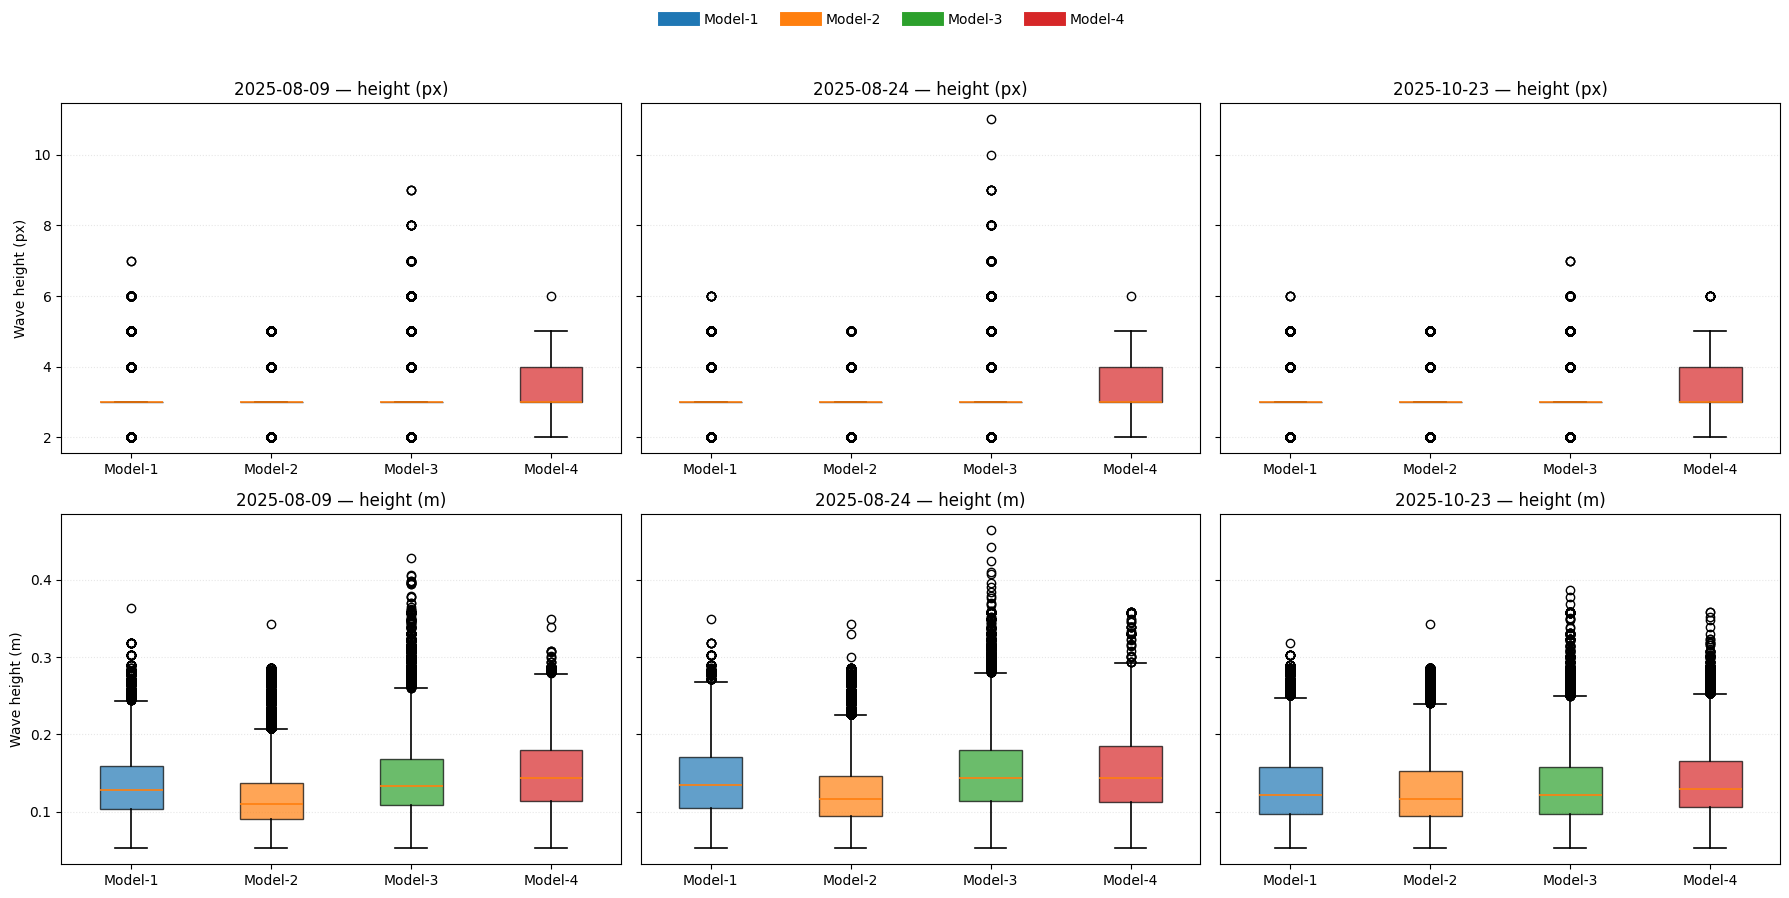

Saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\wave_model_comparison_outputs\boxplots_wave_height_3x2_by_date_px_m.png


In [109]:
import os, re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# PATHS
# ---------------------------------------------------------
destination_folder_results = os.path.join(parent_dir, r"results")
os.makedirs(destination_folder_results, exist_ok=True)

destination_folder_model_results = os.path.join(parent_dir, r"results\model_results")
os.makedirs(destination_folder_model_results, exist_ok=True)

# output folder
out_dir = os.path.join(destination_folder_results, "wave_model_comparison_outputs")
os.makedirs(out_dir, exist_ok=True)

# ---------------------------------------------------------
# INPUT CSVS (FIXED QUOTES)
# ---------------------------------------------------------
waves_csvs = [
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-09_02-00_2025-08-09_23-50.csv"),

    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv"),

    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-10-23_02-00_2025-10-23_23-50.csv"),
]

model_reference_map = {
    "yolov8n-1000_50e":  "Model-1",
    "yolov8n-1000_150e": "Model-2",
    "yolov8s-1000_150e": "Model-3",
    "yolov8s-5000_150e": "Model-4",
}

# ---------------------------------------------------------
# HELPERS
# ---------------------------------------------------------
def model_key_from_path(path: str) -> str:
    base = os.path.basename(path)
    m = re.search(r"(yolov8[ns]-\d+_\d+e)", base)
    if not m:
        raise ValueError(f"Could not parse model key from filename: {base}")
    return m.group(1)

def parse_image_datetime(image_name: str) -> pd.Timestamp:
    # expects: img_2025_08_24_02_20_00.png
    m = re.search(r"img_(\d{4})_(\d{2})_(\d{2})_(\d{2})_(\d{2})_(\d{2})", str(image_name))
    if not m:
        return pd.NaT
    y, mo, d, h, mi, s = map(int, m.groups())
    return pd.Timestamp(year=y, month=mo, day=d, hour=h, minute=mi, second=s)

# ---------------------------------------------------------
# LOAD + STANDARDIZE
# ---------------------------------------------------------
all_df = []
for p in waves_csvs:
    if not os.path.exists(p):
        raise FileNotFoundError(f"CSV not found: {p}")

    df = pd.read_csv(p)

    key = model_key_from_path(p)
    df["model_key"] = key
    df["model_reference"] = model_reference_map.get(key, key)

    # expected columns: x1_crop_px, x2_crop_px, height_px, height_m, image
    df["x_mid_px"] = (df["x1_crop_px"] + df["x2_crop_px"]) / 2.0
    df["dt"] = df["image"].apply(parse_image_datetime)
    df["date"] = df["dt"].dt.strftime("%Y-%m-%d")  # for filtering into the 3 days

    all_df.append(df)

df_all = pd.concat(all_df, ignore_index=True)
df_all = df_all.dropna(subset=["height_px", "height_m", "dt", "date"])

# ---------------------------------------------------------
# MODEL ORDER + CONSISTENT COLORS
# ---------------------------------------------------------
model_order = ["Model-1", "Model-2", "Model-3", "Model-4"]
# keep only those actually present
model_order = [m for m in model_order if m in df_all["model_reference"].unique()]

# fixed, consistent color per model (matplotlib default cycle colors)
default_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
model_colors = {m: default_cycle[i % len(default_cycle)] for i, m in enumerate(model_order)}

def colored_boxplot(ax, data_by_model, labels):
    """
    Draw a boxplot where each model has a fixed color.
    data_by_model: list of arrays aligned with labels
    """
    bp = ax.boxplot(
        data_by_model,
        labels=labels,
        showfliers=True,
        patch_artist=True  # required to fill colors
    )
    for patch, lab in zip(bp["boxes"], labels):
        patch.set_facecolor(model_colors[lab])
        patch.set_alpha(0.7)
    # keep medians/whiskers readable
    for k in ["medians", "whiskers", "caps"]:
        for line in bp[k]:
            line.set_linewidth(1.2)
    return bp

# ---------------------------------------------------------
# 3x2 PANEL BOXPLOTS
# ---------------------------------------------------------
dates = ["2025-08-09", "2025-08-24", "2025-10-23"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9), sharey="row")

for col, d in enumerate(dates):
    df_day = df_all[df_all["date"] == d].copy()

    # --- Row 1: pixels ---
    ax = axes[0, col]
    data_px = [
        df_day.loc[df_day["model_reference"] == m, "height_px"].values
        for m in model_order
    ]
    colored_boxplot(ax, data_px, model_order)
    ax.set_title(f"{d} — height (px)")
    ax.set_ylabel("Wave height (px)" if col == 0 else "")
    ax.grid(axis="y", alpha=0.3, linestyle=":")

    # --- Row 2: meters ---
    ax = axes[1, col]
    data_m = [
        df_day.loc[df_day["model_reference"] == m, "height_m"].values
        for m in model_order
    ]
    colored_boxplot(ax, data_m, model_order)
    ax.set_title(f"{d} — height (m)")
    ax.set_ylabel("Wave height (m)" if col == 0 else "")
    ax.grid(axis="y", alpha=0.3, linestyle=":")

# global legend (model -> color), placed once
legend_handles = [
    plt.Line2D([0], [0], color=model_colors[m], lw=10, label=m)
    for m in model_order
]
fig.legend(handles=legend_handles, loc="upper center", ncol=len(model_order), frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
save_path = os.path.join(out_dir, "boxplots_wave_height_3x2_by_date_px_m.png")
plt.savefig(save_path, dpi=300)
plt.show()
print("Saved:", save_path)

C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1191823681.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = 

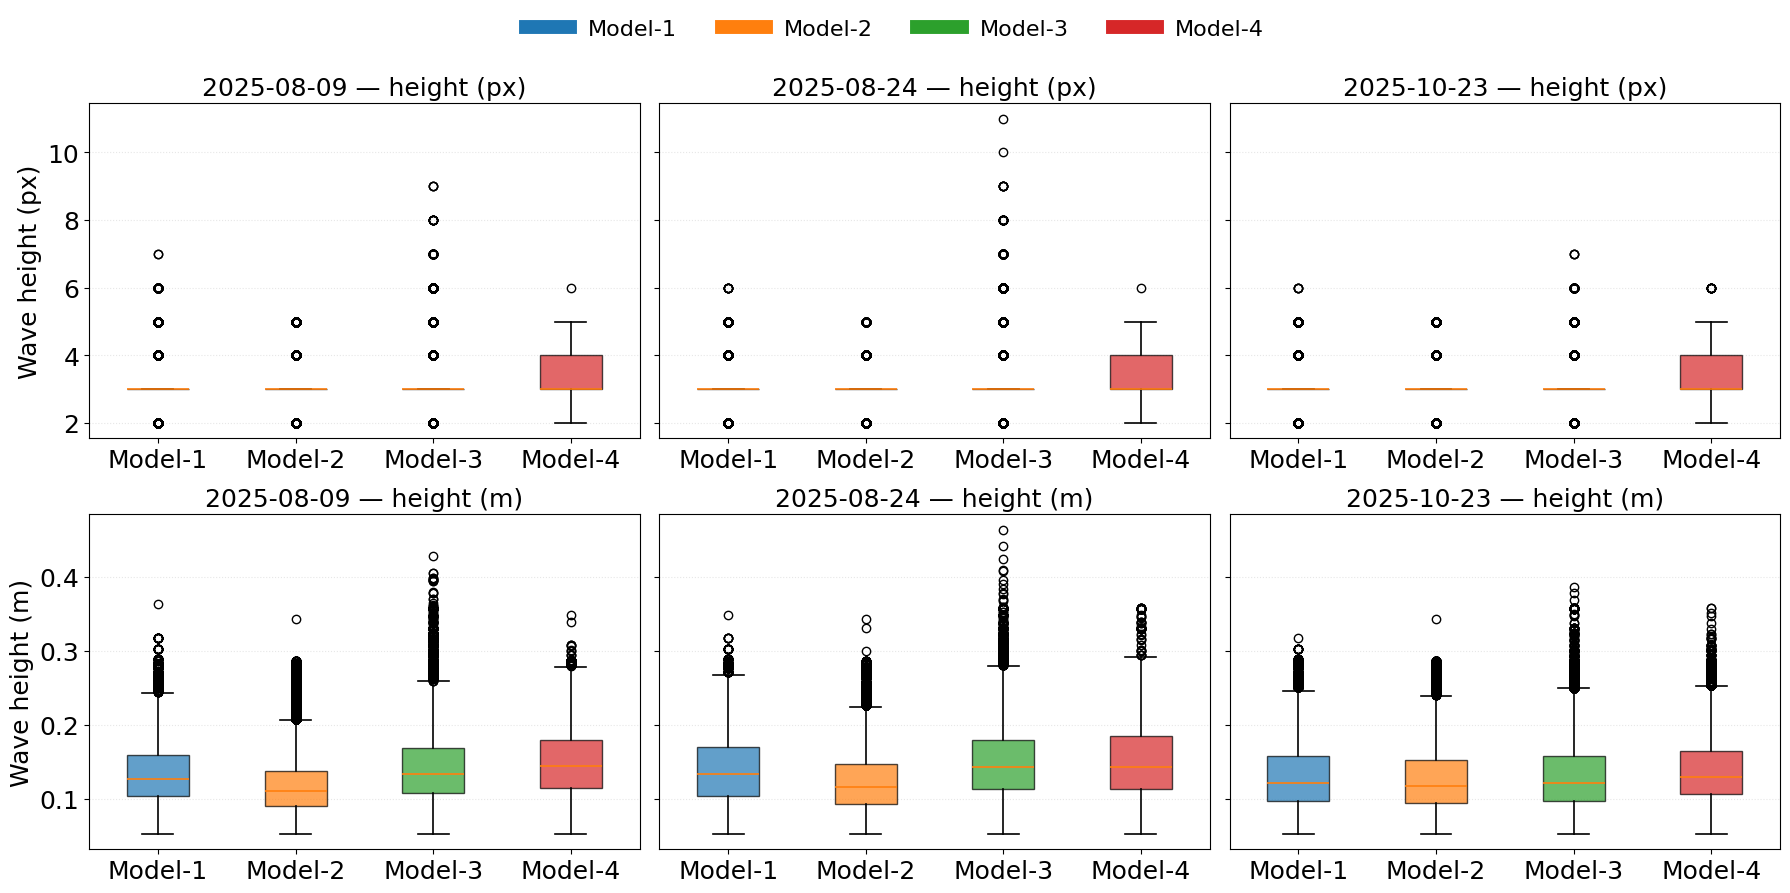

Saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\wave_model_comparison_outputs\boxplots_wave_height_3x2_by_date_px_m.png


In [113]:
# ---------------------------------------------------------
# FONT SIZES
# ---------------------------------------------------------
TITLE_FS  = 18
LABEL_FS  = 18
TICK_FS   = 14
LEGEND_FS = 16

# ---------------------------------------------------------
# 3x2 PANEL BOXPLOTS
# ---------------------------------------------------------
dates = ["2025-08-09", "2025-08-24", "2025-10-23"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9), sharey="row")

for col, d in enumerate(dates):
    df_day = df_all[df_all["date"] == d].copy()

    # --- Row 1: pixels ---
    ax = axes[0, col]
    data_px = [
        df_day.loc[df_day["model_reference"] == m, "height_px"].dropna().values
        for m in model_order
    ]
    colored_boxplot(ax, data_px, model_order)
    ax.set_title(f"{d} — height (px)", fontsize=TITLE_FS)
    ax.set_ylabel("Wave height (px)" if col == 0 else "", fontsize=LABEL_FS)
    ax.grid(axis="y", alpha=0.3, linestyle=":")
    ax.tick_params(axis="both", labelsize=TITLE_FS)

    # --- Row 2: meters ---
    ax = axes[1, col]
    data_m = [
        df_day.loc[df_day["model_reference"] == m, "height_m"].dropna().values
        for m in model_order
    ]
    colored_boxplot(ax, data_m, model_order)
    ax.set_title(f"{d} — height (m)", fontsize=TITLE_FS)
    ax.set_ylabel("Wave height (m)" if col == 0 else "", fontsize=LABEL_FS)
    ax.grid(axis="y", alpha=0.3, linestyle=":")
    ax.tick_params(axis="both", labelsize=TITLE_FS)

# global legend (model -> color), placed once
legend_handles = [
    plt.Line2D([0], [0], color=model_colors[m], lw=10, label=m)
    for m in model_order
]
fig.legend(
    handles=legend_handles,
    loc="upper center",
    ncol=len(model_order),
    frameon=False,
    fontsize=LEGEND_FS
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
save_path = os.path.join(out_dir, "boxplots_wave_height_3x2_by_date_px_m.png")
plt.savefig(save_path, dpi=300)
plt.show()
print("Saved:", save_path)

Global count y-max: 11000
Global height y-max: 0.5103919535875321
Saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\wave_model_comparison_outputs\barplots_counts_plus_Hs_Hmax_4x3.png


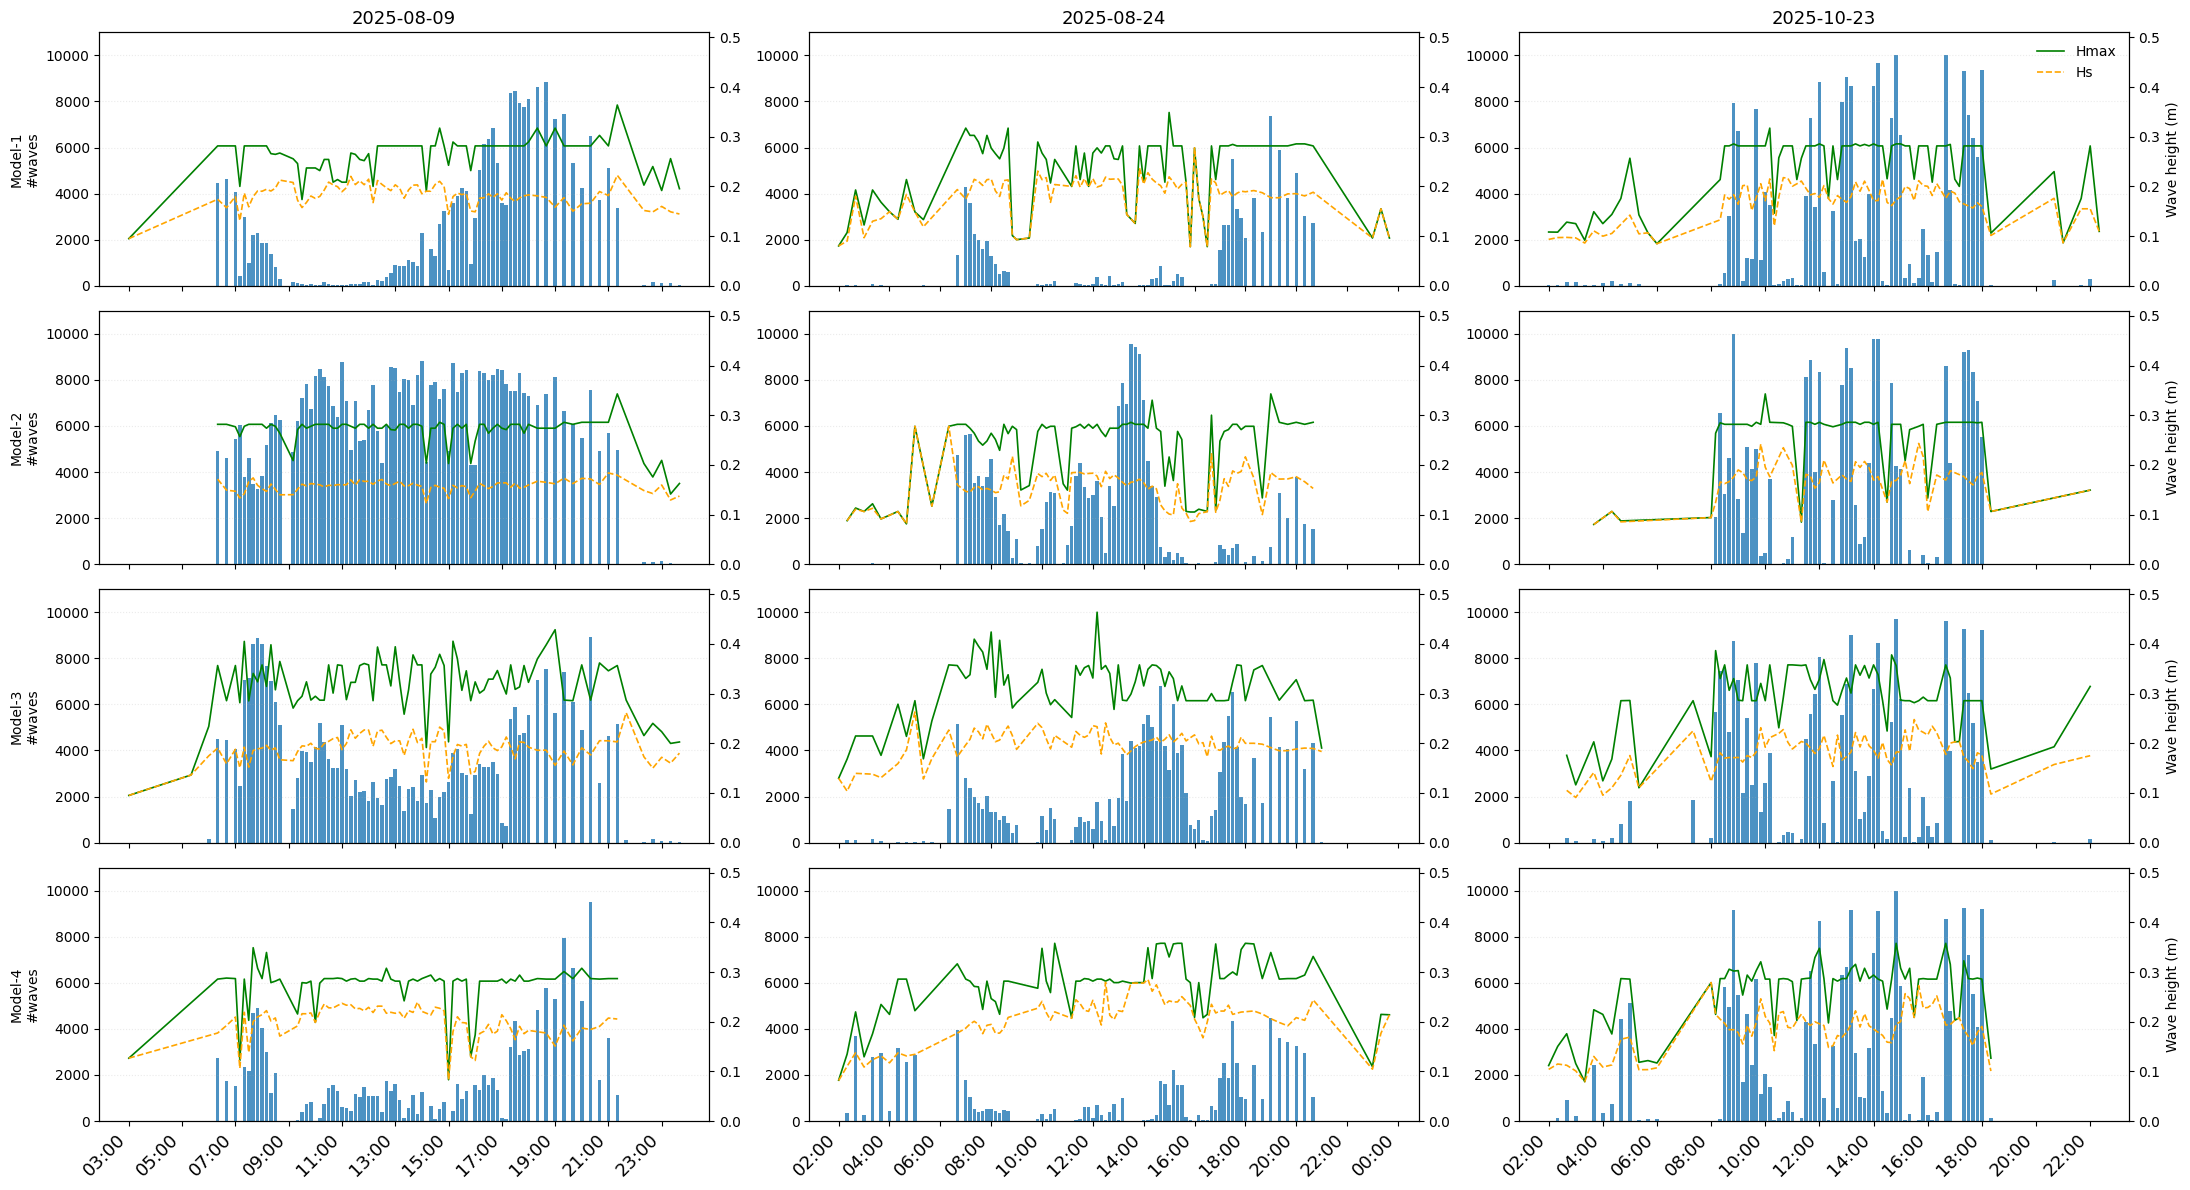

In [105]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# -----------------------------
# SETTINGS
# -----------------------------
dates = ["2025-08-09", "2025-08-24", "2025-10-23"]
model_order = ["Model-1", "Model-2", "Model-3", "Model-4"]

t_start = pd.to_datetime("02:00").time()
t_end   = pd.to_datetime("23:50").time()

CHUNKSIZE = 300_000  # adjust down if still tight (e.g., 100_000)

model_reference_map = {
    "yolov8n-1000_50e":  "Model-1",
    "yolov8n-1000_150e": "Model-2",
    "yolov8s-1000_150e": "Model-3",
    "yolov8s-5000_150e": "Model-4",
}

# -----------------------------
# HELPERS
# -----------------------------
def model_key_from_path(path: str) -> str:
    base = os.path.basename(path)
    m = re.search(r"(yolov8[ns]-\d+_\d+e)", base)
    if not m:
        raise ValueError(f"Could not parse model key from filename: {base}")
    return m.group(1)

def parse_image_datetime_series(image_series: pd.Series) -> pd.Series:
    """
    Vectorized parse of timestamps from strings like:
    img_2025_08_24_02_20_00.png
    """
    s = image_series.astype(str)
    m = s.str.extract(r"img_(\d{4})_(\d{2})_(\d{2})_(\d{2})_(\d{2})_(\d{2})")
    dt = pd.to_datetime(
        m[0] + "-" + m[1] + "-" + m[2] + " " + m[3] + ":" + m[4] + ":" + m[5],
        errors="coerce"
    )
    return dt

def significant_wave_height(heights: np.ndarray) -> float:
    """
    Hs = mean of highest 1/3 of heights (exact).
    Uses np.partition for efficiency (no full sort required).
    """
    n = heights.size
    if n == 0:
        return np.nan
    k = max(1, n // 3)  # top third count
    # get top-k largest values
    topk = np.partition(heights, n - k)[n - k:]
    return float(np.mean(topk))

def finalize_group(dt_val, heights_m):
    heights = np.asarray(heights_m, dtype=np.float32)
    n_waves = int(heights.size)
    hmax = float(np.max(heights)) if n_waves else np.nan
    hs = significant_wave_height(heights) if n_waves else np.nan
    return dt_val, n_waves, hs, hmax

# -----------------------------
# 1) STREAM-AGGREGATE PER CSV
# -----------------------------
all_agg = []  # small list of per-image metrics rows

for p in waves_csvs:
    if not os.path.exists(p):
        raise FileNotFoundError(f"CSV not found: {p}")

    key = model_key_from_path(p)
    model = model_reference_map.get(key, key)

    carry = None  # leftover rows for last dt group (across chunks)

    for chunk in pd.read_csv(p, usecols=["image", "height_m"], chunksize=CHUNKSIZE):
        # parse dt
        chunk["dt"] = parse_image_datetime_series(chunk["image"])
        chunk = chunk.dropna(subset=["dt", "height_m"])

        # filter date and time window
        chunk["date"] = chunk["dt"].dt.strftime("%Y-%m-%d")
        chunk = chunk[chunk["date"].isin(dates)]
        if chunk.empty and carry is None:
            continue

        if not chunk.empty:
            tt = chunk["dt"].dt.time
            chunk = chunk[(tt >= t_start) & (tt <= t_end)]

        # prepend carry (incomplete dt group from previous chunk)
        if carry is not None:
            chunk = pd.concat([carry, chunk], ignore_index=True)
            carry = None

        if chunk.empty:
            continue

        # assume CSV is time-ordered: keep last dt group as carry
        chunk = chunk.sort_values("dt")

        last_dt = chunk["dt"].iloc[-1]
        is_last = (chunk["dt"] == last_dt)

        complete = chunk[~is_last]
        carry = chunk[is_last].copy()

        if complete.empty:
            continue

        # aggregate complete dt groups
        for dt_val, grp in complete.groupby("dt", sort=False):
            heights_m = grp["height_m"].to_numpy(dtype=np.float32, copy=False)
            _, n_waves, hs, hmax = finalize_group(dt_val, heights_m)
            all_agg.append({
                "model_reference": model,
                "date": dt_val.strftime("%Y-%m-%d"),
                "dt": dt_val,
                "n_waves": n_waves,
                "Hs_m": hs,
                "Hmax_m": hmax
            })

    # finalize leftover carry at end of file
    if carry is not None and not carry.empty:
        dt_val = carry["dt"].iloc[0]
        heights_m = carry["height_m"].to_numpy(dtype=np.float32, copy=False)
        _, n_waves, hs, hmax = finalize_group(dt_val, heights_m)
        all_agg.append({
            "model_reference": model,
            "date": dt_val.strftime("%Y-%m-%d"),
            "dt": dt_val,
            "n_waves": n_waves,
            "Hs_m": hs,
            "Hmax_m": hmax
        })

agg = pd.DataFrame(all_agg)

# enforce ordering
agg["date"] = pd.Categorical(agg["date"], categories=dates, ordered=True)
agg["model_reference"] = pd.Categorical(agg["model_reference"], categories=model_order, ordered=True)

# -----------------------------
# 2) GLOBAL AXIS LIMITS (shared across all subplots)
# -----------------------------
global_count_max = agg["n_waves"].max()
count_ymax = int(np.ceil(global_count_max * 1.10))  # 10% headroom

global_hmax = np.nanmax(agg["Hmax_m"].to_numpy())
height_ymax = float(global_hmax * 1.10) if np.isfinite(global_hmax) else 1.0

print("Global count y-max:", count_ymax)
print("Global height y-max:", height_ymax)

# -----------------------------
# 3) PLOT: 4 rows (models) x 3 cols (dates)
# -----------------------------
# Typography: make axis labels as big as panel titles
TITLE_FS = 13
LABEL_FS = TITLE_FS
TICK_FS = 10
LEGEND_FS = 10

fig, axes = plt.subplots(
    nrows=len(model_order),
    ncols=len(dates),
    figsize=(22, 12),
    sharex="col"
)

for r, model in enumerate(model_order):
    for c, d in enumerate(dates):
        ax = axes[r, c]

        sub = agg[(agg["model_reference"] == model) & (agg["date"] == d)].sort_values("dt")

        if sub.empty:
            ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=TITLE_FS)
            ax.set_axis_off()
            continue

        # primary axis: barplot of wave counts
        ax.bar(sub["dt"], sub["n_waves"], width=pd.Timedelta(minutes=8), alpha=0.8)
        ax.set_ylim(0, count_ymax)

        # secondary axis: Hs and Hmax lines
        ax2 = ax.twinx()
        ax2.plot(sub["dt"], sub["Hmax_m"], linewidth=1.2, label="Hmax", color="green",)
        ax2.plot(sub["dt"], sub["Hs_m"],   linewidth=1.2, linestyle="--", label="Hs", color="orange")
        ax2.set_ylim(0, height_ymax)

        # --- IMPORTANT: set tick label sizes on BOTH axes
        ax.tick_params(axis="both", labelsize=TICK_FS)
        ax2.tick_params(axis="both", labelsize=TICK_FS)
        
        # titles / labels
        if r == 0:
            ax.set_title(d, fontsize=TITLE_FS)
        if c == 0:
            ax.set_ylabel(f"{model}\n waves", fontsize=TICK_FS)
        if c == len(dates) - 1:
            ax2.set_ylabel("Wave height (m)", fontsize=TICK_FS)

        # x formatting
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax.grid(axis="y", alpha=0.25, linestyle=":")

        # optional: legend only once (top-right subplot)
        if r == 0 and c == len(dates) - 1:
            ax2.legend(loc="upper right", frameon=False, fontsize=LEGEND_FS)

# rotate bottom x labels
for ax in axes[-1, :]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=TITLE_FS)

plt.tight_layout()
save_path = os.path.join(out_dir, "barplots_counts_plus_Hs_Hmax_4x3.png")
plt.savefig(save_path, dpi=300)
#plt.show()
print("Saved:", save_path)


Saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\wave_model_comparison_outputs\barplots_counts_plus_Hs_Hmax_4x3.png


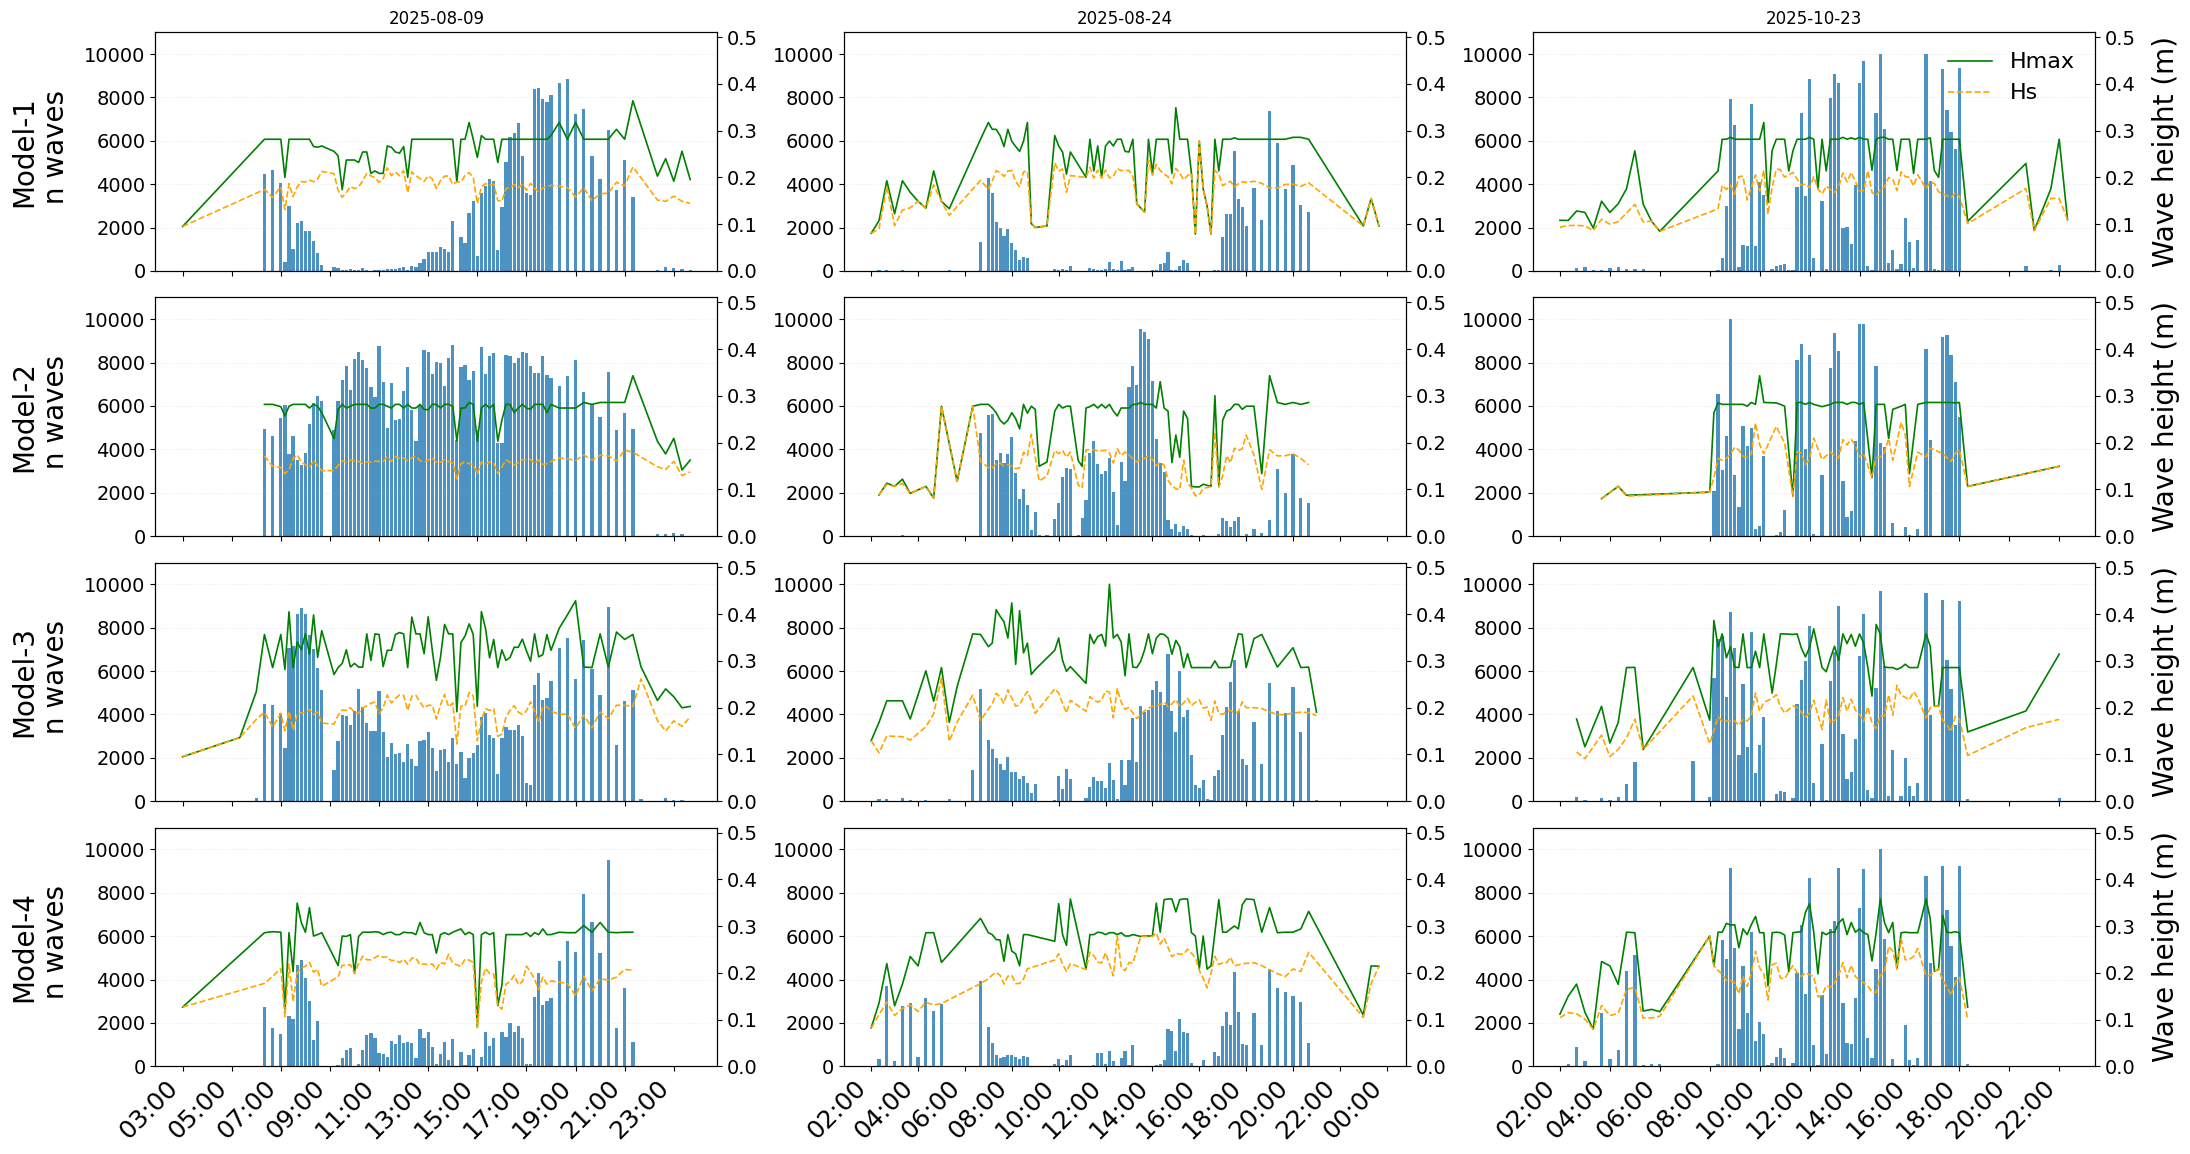

In [119]:
import matplotlib.dates as mdates

# Bigger fonts
TITLE_FS  = 18
LABEL_FS  = 20   # <-- bigger axis labels
TICK_FS   = 14
LEGEND_FS = 16

fig, axes = plt.subplots(
    nrows=len(model_order),
    ncols=len(dates),
    figsize=(22, 12),
    sharex="col"
)

for r, model in enumerate(model_order):
    for c, d in enumerate(dates):
        ax = axes[r, c]

        sub = agg[(agg["model_reference"] == model) & (agg["date"] == d)].sort_values("dt")

        if sub.empty:
            ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=TITLE_FS)
            ax.set_axis_off()
            continue

        # primary axis: barplot of wave counts
        ax.bar(sub["dt"], sub["n_waves"], width=pd.Timedelta(minutes=8), alpha=0.8)
        ax.set_ylim(0, count_ymax)

        # secondary axis: Hs and Hmax lines
        ax2 = ax.twinx()
        ax2.plot(sub["dt"], sub["Hmax_m"], linewidth=1.2, label="Hmax", color="green")
        ax2.plot(sub["dt"], sub["Hs_m"],   linewidth=1.2, linestyle="--", label="Hs", color="orange")
        ax2.set_ylim(0, height_ymax)

        # tick label sizes on BOTH axes
        ax.tick_params(axis="both", labelsize=TICK_FS)
        ax2.tick_params(axis="both", labelsize=TICK_FS)

        # titles / labels
        if r == 0:
            ax.set_title(d)

        # Left y-label (bigger)
        if c == 0:
            ax.set_ylabel(f"{model}\n n waves", fontsize=LABEL_FS, labelpad=10)

        # Right y-label (bigger)
        if c == len(dates) - 1:
            ax2.set_ylabel("Wave height (m)", fontsize=LABEL_FS, labelpad=12)

        # x formatting
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax.grid(axis="y", alpha=0.25, linestyle=":")

        # legend only once
        if r == 0 and c == len(dates) - 1:
            ax2.legend(loc="upper right", frameon=False, fontsize=LEGEND_FS)

# Rotate bottom x labels + size
for ax in axes[-1, :]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=TITLE_FS)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for supxlabel
save_path = os.path.join(out_dir, "barplots_counts_plus_Hs_Hmax_4x3.png")
plt.savefig(save_path, dpi=300)
print("Saved:", save_path)

# Calculating RMSE between Predicted and GT wave height for each image on selected days

In [86]:
# ---------------------------------------------------------
# PATHS
# ---------------------------------------------------------
destination_folder_results = os.path.join(parent_dir, r"results")
os.makedirs(destination_folder_results, exist_ok=True)

destination_folder_model_results = os.path.join(parent_dir, r"results\model_results")
os.makedirs(destination_folder_model_results, exist_ok=True)

# output folder
out_dir = os.path.join(destination_folder_results, "wave_model_comparison_outputs")
os.makedirs(out_dir, exist_ok=True)

# ---------------------------------------------------------
# INPUT CSVS (FIXED QUOTES)
# ---------------------------------------------------------
waves_csvs = [
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-09_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-09_02-00_2025-08-09_23-50.csv"),

    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-08-24_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv"),

    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv"),
    os.path.join(destination_folder_results,
                 r"2025-10-23_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-10-23_02-00_2025-10-23_23-50.csv"),
]

model_reference_map = {
    "yolov8n-1000_50e":  "Model-1",
    "yolov8n-1000_150e": "Model-2",
    "yolov8s-1000_150e": "Model-3",
    "yolov8s-5000_150e": "Model-4",
}


In [95]:
import os, re
from pathlib import Path
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

# =========================================================
# SETTINGS
# =========================================================
parent_dir = Path(parent_dir)  # <-- you must set this before running
source_folder_idximg = parent_dir / "idx_images"

X_MIN, X_MAX = 3837, 4767
Y_MIN, Y_MAX = 1555, 2035

def ppm_at_y(y_full_px: float) -> float:
    return 0.05071 * float(y_full_px) - 65.01

def rmse(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    m = np.isfinite(a) & np.isfinite(b)
    return float(np.sqrt(np.mean((a[m] - b[m])**2))) if m.any() else np.nan

# =========================================================
# PATHS / OUTPUT
# =========================================================
destination_folder_results = parent_dir / "results"
destination_folder_results.mkdir(parents=True, exist_ok=True)

destination_folder_model_results = destination_folder_results / "model_results"
destination_folder_model_results.mkdir(parents=True, exist_ok=True)

debug_out_dir = destination_folder_model_results / "rmse_height_per_image_debug"
debug_out_dir.mkdir(parents=True, exist_ok=True)

# =========================================================
# INPUT CSVs (you already have this list)
# =========================================================
# waves_csvs = [...]
# model_reference_map = {...}

# =========================================================
# LOAD METADATA (FIX: mixed date formats!)
# =========================================================
def parse_metadata_dt(meta_df: pd.DataFrame) -> pd.Series:
    d = meta_df["date"].astype(str).str.strip()
    t = meta_df["time"].astype(str).str.strip()
    s = d + " " + t

    # pass 1: dayfirst (handles dd/mm/yyyy)
    dt1 = pd.to_datetime(s, dayfirst=True, errors="coerce")

    # pass 2: non-dayfirst (handles yyyy-mm-dd)
    m = dt1.isna()
    if m.any():
        dt2 = pd.to_datetime(s[m], dayfirst=False, errors="coerce")
        dt1.loc[m] = dt2

    return dt1.dt.floor("s")

path_idx_list = source_folder_idximg / "image_metadata.csv"
meta = pd.read_csv(path_idx_list)

meta["dt"] = parse_metadata_dt(meta)
meta = meta.dropna(subset=["dt", "new_image_name"]).copy()
dt_to_gtname = dict(zip(meta["dt"], meta["new_image_name"]))

print("✅ metadata rows:", len(meta))
print("✅ unique dt keys:", len(dt_to_gtname))
print("✅ dt range:", meta["dt"].min(), "→", meta["dt"].max())

# =========================================================
# HELPERS
# =========================================================
def parse_pred_image_dt(image_name: str) -> pd.Timestamp:
    # expected like: img_2025_10_23_02_00_00.png
    m = re.search(r"img_(\d{4})_(\d{2})_(\d{2})_(\d{2})_(\d{2})_(\d{2})", str(image_name))
    if not m:
        return pd.NaT
    y, mo, d, h, mi, s = map(int, m.groups())
    return pd.Timestamp(year=y, month=mo, day=d, hour=h, minute=mi, second=s).floor("s")

def gt_label_path_from_gt_image(gt_image_name: str) -> Path:
    return (source_folder_idximg / gt_image_name).with_suffix(".txt")

def load_gt_yolo_norm(label_path: Path, class_id=0):
    if not label_path.exists():
        return []
    out = []
    for line in label_path.read_text(encoding="utf-8").splitlines():
        p = line.strip().split()
        if len(p) != 5:
            continue
        if int(float(p[0])) != class_id:
            continue
        cx, cy, w, h = map(float, p[1:])
        out.append((cx, cy, w, h))
    return out

_img_size_cache = {}
def get_img_size(gt_image_name: str):
    if gt_image_name in _img_size_cache:
        return _img_size_cache[gt_image_name]
    img_path = source_folder_idximg / gt_image_name
    with Image.open(img_path) as im:
        W, H = im.size
    _img_size_cache[gt_image_name] = (W, H)
    return W, H

def gt_roi_heights_for_image(gt_image_name: str, class_id=0):
    lbl = gt_label_path_from_gt_image(gt_image_name)
    lab = load_gt_yolo_norm(lbl, class_id=class_id)
    if not lab:
        return []

    W, H = get_img_size(gt_image_name)

    out = []
    for cx, cy, w, h in lab:
        x_mid = cx * W
        y_mid = cy * H

        if not (X_MIN <= x_mid <= X_MAX and Y_MIN <= y_mid <= Y_MAX):
            continue

        height_px = h * H
        ppm = ppm_at_y(y_mid)
        height_m = height_px / ppm if np.isfinite(ppm) and ppm > 0 else np.nan
        out.append((height_px, height_m))

    return out

def model_key_from_path(path: str) -> str:
    base = os.path.basename(path)
    m = re.search(r"(yolov8[ns]-\d+_\d+e)", base)
    return m.group(1) if m else "unknown"

def normalize_pred_df(dfp: pd.DataFrame) -> pd.DataFrame:
    dfp = dfp.copy()

    # force numeric
    for col in ["height_px", "height_m", "y_mid_full_px", "y_mid_crop_px", "y_mid_px"]:
        if col in dfp.columns:
            dfp[col] = pd.to_numeric(dfp[col], errors="coerce")

    # if only crop y exists, convert to full y
    if "y_mid_full_px" not in dfp.columns:
        if "y_mid_crop_px" in dfp.columns:
            dfp["y_mid_full_px"] = dfp["y_mid_crop_px"] + Y_MIN
        elif "y_mid_px" in dfp.columns:
            dfp["y_mid_full_px"] = dfp["y_mid_px"] + Y_MIN

    # recompute height_m if missing / mostly NaN
    if ("height_m" not in dfp.columns) or (dfp["height_m"].isna().mean() > 0.5):
        if "height_px" in dfp.columns and "y_mid_full_px" in dfp.columns:
            ppm = dfp["y_mid_full_px"].apply(ppm_at_y).replace(0, np.nan)
            dfp["height_m"] = dfp["height_px"] / ppm

    return dfp

# =========================================================
# MAIN
# =========================================================
def height_rmse_from_pred_csv(pred_csv_path: str, class_id=0, agg="mean", debug=True):
    dfp = pd.read_csv(pred_csv_path)

    dfp["dt"] = dfp["image"].apply(parse_pred_image_dt)
    dfp["gt_image_name"] = dfp["dt"].map(dt_to_gtname)

    n_all = len(dfp)
    dfp = dfp.dropna(subset=["gt_image_name"]).copy()
    dfp = normalize_pred_df(dfp)

    if debug:
        print(f"\n=== {pred_csv_path} ===")
        print(f"🔗 mapped rows: {len(dfp)}/{n_all} (unmapped: {n_all-len(dfp)})")
        print(dfp[["image", "dt", "gt_image_name"]].head(3))
        for c in ["height_px", "height_m", "y_mid_full_px"]:
            if c in dfp.columns:
                print(f"🧪 pred NaN% {c}: {(dfp[c].isna().mean()*100):.2f}%")

    # ROI filter on predictions
    if "y_mid_full_px" in dfp.columns:
        before = len(dfp)
        dfp = dfp[(dfp["y_mid_full_px"] >= Y_MIN) & (dfp["y_mid_full_px"] <= Y_MAX)]
        if debug:
            print(f"📍 pred ROI filter: {len(dfp)}/{before} rows kept")

    # aggregate predictions per image
    fn = "median" if agg == "median" else "mean"
    pred_agg = dfp.groupby("gt_image_name", as_index=False).agg(
        pred_hpx=("height_px", fn),
        pred_hm=("height_m", fn),
        n_pred=("height_px", "size"),
    )

    # aggregate GT per image (ROI + class filtered)
    gt_rows = []
    missing_lbl = 0
    for gtname in pred_agg["gt_image_name"].unique():
        lbl = gt_label_path_from_gt_image(gtname)
        if not lbl.exists():
            missing_lbl += 1

        waves = gt_roi_heights_for_image(gtname, class_id=class_id)
        if not waves:
            continue

        hpx = [w[0] for w in waves]
        hm  = [w[1] for w in waves if np.isfinite(w[1])]

        if agg == "median":
            gt_hpx = float(np.median(hpx)) if hpx else np.nan
            gt_hm  = float(np.median(hm)) if hm else np.nan
        else:
            gt_hpx = float(np.mean(hpx)) if hpx else np.nan
            gt_hm  = float(np.mean(hm)) if hm else np.nan

        gt_rows.append({"gt_image_name": gtname, "gt_hpx": gt_hpx, "gt_hm": gt_hm, "n_gt": len(hpx)})

    gt_agg = pd.DataFrame(gt_rows)

    merged = pred_agg.merge(gt_agg, on="gt_image_name", how="inner") if not gt_agg.empty else pd.DataFrame()
    merged_clean = merged.copy()
    if not merged_clean.empty:
        merged_clean = merged_clean[
            np.isfinite(merged_clean["pred_hpx"]) & np.isfinite(merged_clean["gt_hpx"]) &
            np.isfinite(merged_clean["pred_hm"])  & np.isfinite(merged_clean["gt_hm"])
        ].copy()

    if debug:
        print("📊 pred_agg images:", len(pred_agg))
        print("📊 gt_agg images:", len(gt_agg))
        print("🔗 merged images:", len(merged))
        print("🧽 merged clean:", len(merged_clean))
        print("🏷️ missing GT label files (among pred images):", missing_lbl)

    out = {
        "pred_csv": str(pred_csv_path),
        "agg": agg,
        "n_images_used": int(len(merged_clean)),
        "RMSE_height_px": rmse(merged_clean["pred_hpx"], merged_clean["gt_hpx"]) if len(merged_clean) else np.nan,
        "RMSE_height_m": rmse(merged_clean["pred_hm"], merged_clean["gt_hm"]) if len(merged_clean) else np.nan,
    }
    return out, merged, merged_clean

✅ metadata rows: 27592
✅ unique dt keys: 27592
✅ dt range: 2022-05-01 12:00:00 → 2025-11-15 23:40:00


In [97]:
# =========================================================
# RUN ALL
# =========================================================
rows = []

for pred_csv in tqdm(waves_csvs, desc="RMSE height (all days × models)"):
    pred_csv = str(pred_csv)
    if not os.path.exists(pred_csv):
        print(f"⚠️ Missing: {pred_csv}")
        continue

    key = model_key_from_path(pred_csv)
    model_ref = model_reference_map.get(key, key)

    res, merged_all, merged_clean = height_rmse_from_pred_csv(pred_csv, class_id=0, agg="mean", debug=True)

    # get day from file content
    try:
        tmp = pd.read_csv(pred_csv, usecols=["image"])
        tmp["dt"] = tmp["image"].apply(parse_pred_image_dt)
        day = str(tmp["dt"].dropna().dt.date.iloc[0]) if tmp["dt"].notna().any() else ""
    except Exception:
        day = ""
    res["day"] = day
    res["model_key"] = key
    res["model_reference"] = model_ref

    rows.append(res)

    save_all   = debug_out_dir / f"merged_ALL_{model_ref}_{day}.csv"
    save_clean = debug_out_dir / f"merged_CLEAN_{model_ref}_{day}.csv"
    merged_all.to_csv(save_all, index=False)
    merged_clean.to_csv(save_clean, index=False)
    print("💾 saved:", save_all)
    print("💾 saved:", save_clean)

summary = pd.DataFrame(rows).sort_values(["day", "model_reference"])
summary_csv = debug_out_dir / "RMSE_wave_height_px_m_summary.csv"
summary.to_csv(summary_csv, index=False)

print("✅ Saved summary:", summary_csv)
print(summary)


RMSE height (all days × models):   0%|                                                          | 0/12 [00:00<?, ?it/s]


=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-09_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-09_02-00_2025-08-09_23-50.csv ===
🔗 mapped rows: 139937/139937 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_09_03_00_00.png 2025-08-09 03:00:00  img_17524.png
1  img_2025_08_09_06_20_00.png 2025-08-09 06:20:00  img_17534.png
2  img_2025_08_09_06_20_00.png 2025-08-09 06:20:00  img_17534.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 139937/139937 rows kept
📊 pred_agg images: 76
📊 gt_agg images: 75
🔗 merged images: 75
🧽 merged clean: 75
🏷️ missing GT label files (among pred images): 0


RMSE height (all days × models):   8%|████▏                                             | 1/12 [00:10<01:58, 10.74s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-4_2025-08-09.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-4_2025-08-09.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-09_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv ===
🔗 mapped rows: 303421/303421 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_09_03_00_00.png 2025-08-09 03:00:00  img_17524.png
1  img_2025_08_09_05_20_00.png 2025-08-09 05:20:00  img_17531.png
2  img_2025_08_09_06_00_00.png 2025-08-09 06:00:00  img_17533.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 303421/303421 rows kept
📊 pred_agg images: 86
📊 gt_agg images: 81
🔗 merged images: 81
🧽 merged clean: 81
🏷️ missing GT label files (am

RMSE height (all days × models):  17%|████████▎                                         | 2/12 [00:31<02:47, 16.73s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-3_2025-08-09.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-3_2025-08-09.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-09_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-09_02-00_2025-08-09_23-50.csv ===
🔗 mapped rows: 517611/517611 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_09_06_20_00.png 2025-08-09 06:20:00  img_17534.png
1  img_2025_08_09_06_20_00.png 2025-08-09 06:20:00  img_17534.png
2  img_2025_08_09_06_20_00.png 2025-08-09 06:20:00  img_17534.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 517611/517611 rows kept
📊 pred_agg images: 82
📊 gt_agg images: 81
🔗 merged images: 81
🧽 merged clean: 81
🏷️ missing GT label files

RMSE height (all days × models):  25%|████████████▌                                     | 3/12 [01:12<04:07, 27.56s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-2_2025-08-09.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-2_2025-08-09.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-09_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-09_02-00_2025-08-09_23-50.csv ===
🔗 mapped rows: 206780/206780 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_09_03_00_00.png 2025-08-09 03:00:00  img_17524.png
1  img_2025_08_09_03_00_00.png 2025-08-09 03:00:00  img_17524.png
2  img_2025_08_09_06_20_00.png 2025-08-09 06:20:00  img_17534.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 206780/206780 rows kept
📊 pred_agg images: 83
📊 gt_agg images: 81
🔗 merged images: 81
🧽 merged clean: 81
🏷️ missing GT label files (

RMSE height (all days × models):  33%|████████████████▋                                 | 4/12 [01:27<03:00, 22.59s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-1_2025-08-09.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-1_2025-08-09.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-24_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-08-24_02-00_2025-08-24_23-50.csv ===
🔗 mapped rows: 84693/84693 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_24_02_00_00.png 2025-08-24 02:00:00  img_19073.png
1  img_2025_08_24_02_00_00.png 2025-08-24 02:00:00  img_19073.png
2  img_2025_08_24_02_00_00.png 2025-08-24 02:00:00  img_19073.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 84693/84693 rows kept
📊 pred_agg images: 79
📊 gt_agg images: 69
🔗 merged images: 69
🧽 merged clean: 69
🏷️ missing GT label files (among 

RMSE height (all days × models):  42%|████████████████████▊                             | 5/12 [01:33<01:58, 16.94s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-4_2025-08-24.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-4_2025-08-24.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-24_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv ===
🔗 mapped rows: 175532/175532 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_24_02_00_00.png 2025-08-24 02:00:00  img_19073.png
1  img_2025_08_24_02_20_00.png 2025-08-24 02:20:00  img_19074.png
2  img_2025_08_24_02_20_00.png 2025-08-24 02:20:00  img_19074.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 175532/175532 rows kept
📊 pred_agg images: 81
📊 gt_agg images: 71
🔗 merged images: 71
🧽 merged clean: 71
🏷️ missing GT label files (am

RMSE height (all days × models):  50%|█████████████████████████                         | 6/12 [01:47<01:35, 15.84s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-3_2025-08-24.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-3_2025-08-24.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-24_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-08-24_02-00_2025-08-24_23-50.csv ===
🔗 mapped rows: 175703/175703 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_24_02_20_00.png 2025-08-24 02:20:00  img_19074.png
1  img_2025_08_24_02_20_00.png 2025-08-24 02:20:00  img_19074.png
2  img_2025_08_24_02_40_00.png 2025-08-24 02:40:00  img_19075.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 175703/175703 rows kept
📊 pred_agg images: 82
📊 gt_agg images: 71
🔗 merged images: 71
🧽 merged clean: 71
🏷️ missing GT label files

RMSE height (all days × models):  58%|█████████████████████████████▏                    | 7/12 [02:01<01:16, 15.31s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-2_2025-08-24.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-2_2025-08-24.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-08-24_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-08-24_02-00_2025-08-24_23-50.csv ===
🔗 mapped rows: 80788/80788 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_08_24_02_00_00.png 2025-08-24 02:00:00  img_19073.png
1  img_2025_08_24_02_00_00.png 2025-08-24 02:00:00  img_19073.png
2  img_2025_08_24_02_20_00.png 2025-08-24 02:20:00  img_19074.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 80788/80788 rows kept
📊 pred_agg images: 83
📊 gt_agg images: 71
🔗 merged images: 71
🧽 merged clean: 71
🏷️ missing GT label files (amon

RMSE height (all days × models):  67%|█████████████████████████████████▎                | 8/12 [02:09<00:51, 12.88s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-1_2025-08-24.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-1_2025-08-24.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-10-23_YOLO8S_5000_wave_stat\waves_04_waves_yolov8s-5000_150e_2025-10-23_02-00_2025-10-23_23-50.csv ===
🔗 mapped rows: 210111/210111 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_10_23_02_00_00.png 2025-10-23 02:00:00  img_25171.png
1  img_2025_10_23_02_00_00.png 2025-10-23 02:00:00  img_25171.png
2  img_2025_10_23_02_00_00.png 2025-10-23 02:00:00  img_25171.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 210111/210111 rows kept
📊 pred_agg images: 74
📊 gt_agg images: 61
🔗 merged images: 61
🧽 merged clean: 61
🏷️ missing GT label files (am

RMSE height (all days × models):  75%|█████████████████████████████████████▌            | 9/12 [02:28<00:44, 14.70s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-4_2025-10-23.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-4_2025-10-23.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-10-23_YOLO8S_1000_wave_stat\waves_03_waves_yolov8s-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv ===
🔗 mapped rows: 222955/222955 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_10_23_02_40_00.png 2025-10-23 02:40:00  img_25173.png
1  img_2025_10_23_02_40_00.png 2025-10-23 02:40:00  img_25173.png
2  img_2025_10_23_02_40_00.png 2025-10-23 02:40:00  img_25173.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 222955/222955 rows kept
📊 pred_agg images: 69
📊 gt_agg images: 59
🔗 merged images: 59
🧽 merged clean: 59
🏷️ missing GT label files (am

RMSE height (all days × models):  83%|████████████████████████████████████████▊        | 10/12 [02:48<00:32, 16.34s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-3_2025-10-23.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-3_2025-10-23.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-10-23_YOLO8N_1000-150_wave_stat\waves_02_waves_yolov8n-1000_150e_2025-10-23_02-00_2025-10-23_23-50.csv ===
🔗 mapped rows: 207085/207085 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_10_23_03_40_00.png 2025-10-23 03:40:00  img_25176.png
1  img_2025_10_23_04_20_00.png 2025-10-23 04:20:00  img_25178.png
2  img_2025_10_23_04_20_00.png 2025-10-23 04:20:00  img_25178.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 207085/207085 rows kept
📊 pred_agg images: 55
📊 gt_agg images: 51
🔗 merged images: 51
🧽 merged clean: 51
🏷️ missing GT label files

RMSE height (all days × models):  92%|████████████████████████████████████████████▉    | 11/12 [03:04<00:16, 16.16s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-2_2025-10-23.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-2_2025-10-23.csv

=== C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\2025-10-23_YOLO8N_1000-50_wave_stat\waves_02_waves_yolov8n-1000_50e_2025-10-23_02-00_2025-10-23_23-50.csv ===
🔗 mapped rows: 204130/204130 (unmapped: 0)
                         image                  dt  gt_image_name
0  img_2025_10_23_02_00_00.png 2025-10-23 02:00:00  img_25171.png
1  img_2025_10_23_02_00_00.png 2025-10-23 02:00:00  img_25171.png
2  img_2025_10_23_02_00_00.png 2025-10-23 02:00:00  img_25171.png
🧪 pred NaN% height_px: 0.00%
🧪 pred NaN% height_m: 0.00%
🧪 pred NaN% y_mid_full_px: 0.00%
📍 pred ROI filter: 204130/204130 rows kept
📊 pred_agg images: 77
📊 gt_agg images: 64
🔗 merged images: 64
🧽 merged clean: 64
🏷️ missing GT label files (

RMSE height (all days × models): 100%|█████████████████████████████████████████████████| 12/12 [03:19<00:00, 16.66s/it]

💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_ALL_Model-1_2025-10-23.csv
💾 saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\merged_CLEAN_Model-1_2025-10-23.csv
✅ Saved summary: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\model_results\rmse_height_per_image_debug\RMSE_wave_height_px_m_summary.csv
                                             pred_csv   agg  n_images_used  \
3   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...  mean             81   
2   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...  mean             81   
1   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...  mean             81   
0   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...  mean             75   
7   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...  mean             71   
6   C:\Users\A\Documents\XX_GitHub_Repo\data-waves...  mean             71   
5   C:\Users\A\Documents

### Grouped bar chart: RMSE (m) by model × day

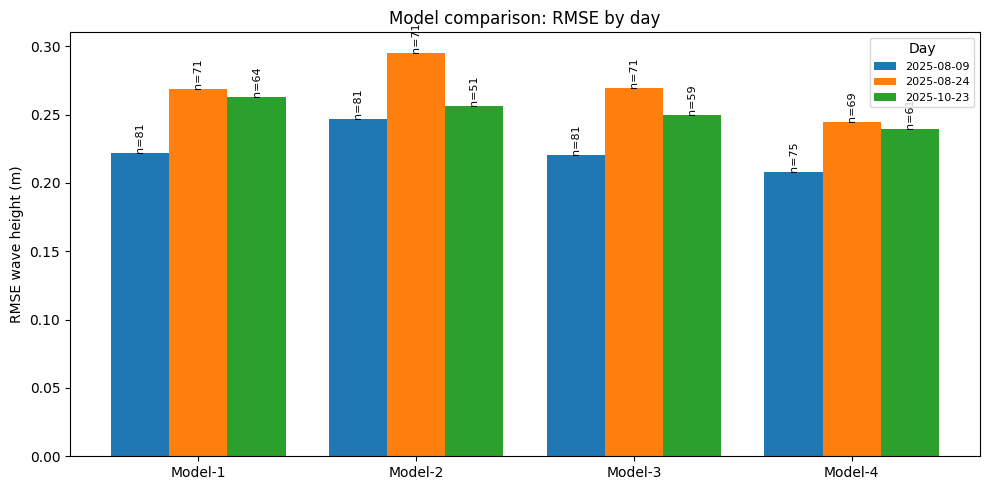

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# summary must have: day, model_reference, RMSE_height_m, n_images_used
df = summary.copy()
df = df.sort_values(["day", "model_reference"])

days = sorted(df["day"].unique())
models = sorted(df["model_reference"].unique())

x = np.arange(len(models))
bar_w = 0.8 / max(1, len(days))

plt.figure(figsize=(10, 5))

for i, day in enumerate(days):
    sub = df[df["day"] == day].set_index("model_reference").reindex(models)
    y = sub["RMSE_height_m"].values
    plt.bar(x + i*bar_w - 0.4 + bar_w/2, y, width=bar_w, label=str(day))

    # annotate n_images_used
    n = sub["n_images_used"].values
    for xi, yi, ni in zip(x + i*bar_w - 0.4 + bar_w/2, y, n):
        if np.isfinite(yi):
            plt.text(xi, yi, f"n={int(ni)}", ha="center", va="bottom", fontsize=8, rotation=90)

plt.xticks(x, models)
plt.ylabel("RMSE wave height (m)")
plt.title("Model comparison: RMSE by day")
plt.legend(title="Day", fontsize=8)
plt.tight_layout()
plt.show()

# Boxplot: per-image absolute error (m) across all days

C:\Users\A\AppData\Local\Temp\ipykernel_15500\2182066500.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=models, showfliers=True)


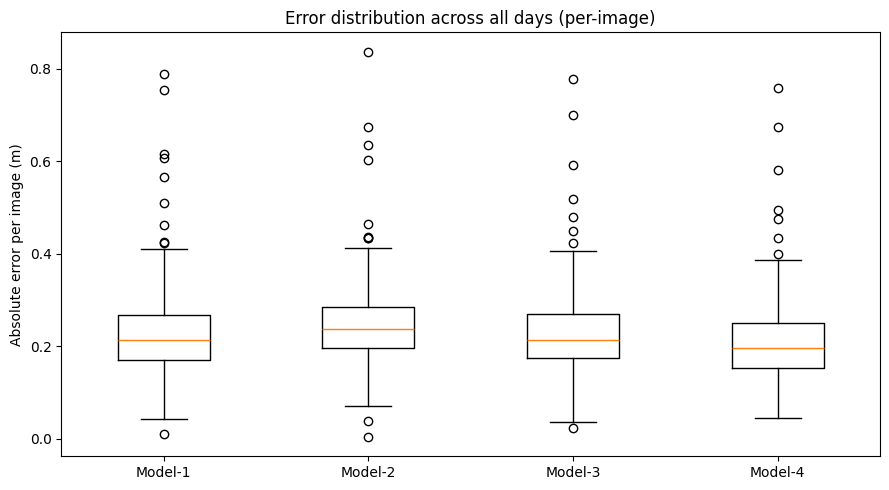

In [99]:
from pathlib import Path
import glob

# point this to your debug folder with merged_CLEAN_*.csv
debug_dir = Path(destination_folder_model_results) / "rmse_height_per_image_debug"
files = sorted(glob.glob(str(debug_dir / "merged_CLEAN_*.csv")))

all_rows = []
for f in files:
    m = pd.read_csv(f)
    if m.empty:
        continue
    # infer model from filename: merged_CLEAN_{Model-X}_{day}.csv
    name = Path(f).stem
    # split safely
    parts = name.split("_")
    model_ref = parts[2] if len(parts) >= 3 else "unknown"
    m["model_reference"] = model_ref
    m["abs_err_m"] = (m["pred_hm"] - m["gt_hm"]).abs()
    all_rows.append(m[["model_reference", "abs_err_m"]])

E = pd.concat(all_rows, ignore_index=True)
models = sorted(E["model_reference"].unique())

data = [E.loc[E["model_reference"] == mod, "abs_err_m"].dropna().values for mod in models]

plt.figure(figsize=(9, 5))
plt.boxplot(data, labels=models, showfliers=True)
plt.ylabel("Absolute error per image (m)")
plt.title("Error distribution across all days (per-image)")
plt.tight_layout()
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_15500\1924975138.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1924975138.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1924975138.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
C:\Users\A\AppData\Local\Temp\ipykernel_15500\1924975138.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.b

Saved: C:\Users\A\Documents\XX_GitHub_Repo\data-waves\results\wave_model_comparison_outputs\boxplot_RMSE_Predicted_GT_Label_by_day_px_m.png


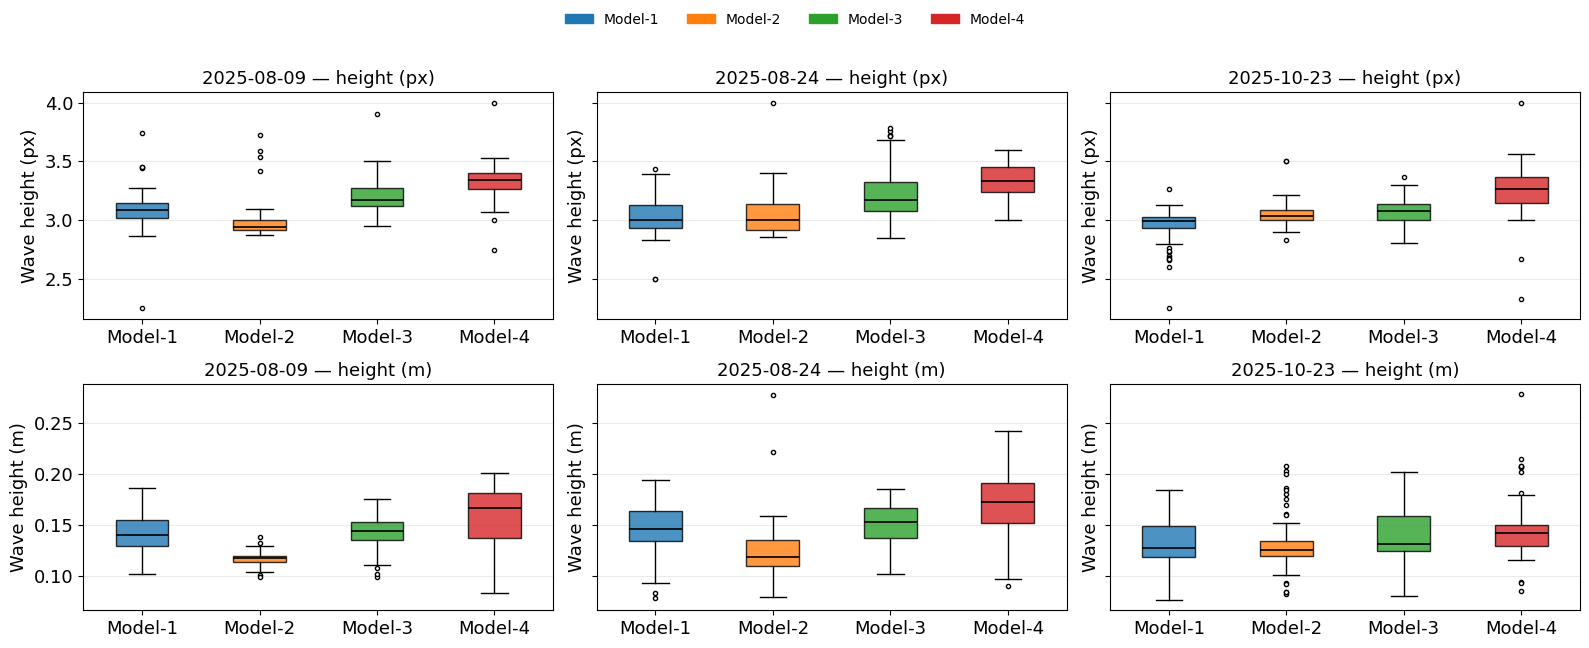

In [123]:
import re
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ---------------------------------------------------------
# CONFIG
# ---------------------------------------------------------
debug_dir = Path(destination_folder_model_results) / "rmse_height_per_image_debug"
files = sorted(glob.glob(str(debug_dir / "merged_CLEAN_*.csv")))
if not files:
    raise FileNotFoundError(f"No merged_CLEAN_*.csv found in: {debug_dir}")

PLOT_MODE = "pred"  # "pred" or "abs_error"

MODEL_ORDER = ["Model-1", "Model-2", "Model-3", "Model-4"]
MODEL_COLORS = {
    "Model-1": "#1f77b4",
    "Model-2": "#ff7f0e",
    "Model-3": "#2ca02c",
    "Model-4": "#d62728",
}

pat = re.compile(r"merged_CLEAN_(.+)_(\d{4}-\d{2}-\d{2})$")

# Typography: make axis labels as big as panel titles
TITLE_FS = 13
LABEL_FS = TITLE_FS
TICK_FS = 10
LEGEND_FS = 10

# ---------------------------------------------------------
# LOAD
# ---------------------------------------------------------
rows = []
for f in files:
    stem = Path(f).stem
    m = pat.match(stem)
    if not m:
        continue
    model_ref, day = m.group(1), m.group(2)

    df = pd.read_csv(f)
    if df.empty:
        continue

    for c in ["pred_hpx", "gt_hpx", "pred_hm", "gt_hm"]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    df["model_reference"] = model_ref
    df["day"] = day
    rows.append(df)

E = pd.concat(rows, ignore_index=True)

models_present = [m for m in MODEL_ORDER if m in set(E["model_reference"])]
if not models_present:
    raise ValueError(f"No models found among {MODEL_ORDER}. Found: {sorted(E['model_reference'].unique())}")

days = sorted(E["day"].unique())
if len(days) < 3:
    raise ValueError(f"Need 3 days for 3 columns, found: {days}")
days = days[:3]

# ---------------------------------------------------------
# Build plotting values
# ---------------------------------------------------------
if PLOT_MODE == "abs_error":
    E["val_px"] = (E["pred_hpx"] - E["gt_hpx"]).abs()
    E["val_m"]  = (E["pred_hm"]  - E["gt_hm"]).abs()
    ylab_px = "Wave height (px)"
    ylab_m  = "Wave height (m)"
elif PLOT_MODE == "pred":
    E["val_px"] = E["pred_hpx"]
    E["val_m"]  = E["pred_hm"]
    ylab_px = "Wave height (px)"
    ylab_m  = "Wave height (m)"
else:
    raise ValueError("PLOT_MODE must be 'pred' or 'abs_error'")

E = E.dropna(subset=["val_px", "val_m", "day", "model_reference"])

# ---------------------------------------------------------
# Helper
# ---------------------------------------------------------
def colored_boxplot(ax, data_by_model, model_list):
    bp = ax.boxplot(
        data_by_model,
        labels=model_list,
        patch_artist=True,
        showfliers=True,
        medianprops=dict(color="black", linewidth=1.2),
        whiskerprops=dict(color="black", linewidth=1.0),
        capprops=dict(color="black", linewidth=1.0),
        boxprops=dict(edgecolor="black", linewidth=1.0),
        flierprops=dict(marker="o", markersize=3, markerfacecolor="white",
                        markeredgecolor="black", alpha=1.0),
    )
    for patch, model in zip(bp["boxes"], model_list):
        patch.set_facecolor(MODEL_COLORS.get(model, "lightgray"))
        patch.set_alpha(0.8)
    return bp

# ---------------------------------------------------------
# PLOT
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6.5), sharey="row")

for axrow in axes:
    for ax in axrow:
        ax.grid(True, axis="y", alpha=0.25)
        ax.set_axisbelow(True)

for j, day in enumerate(days):
    sub = E[E["day"] == day]

    # Row 1: px
    ax = axes[0, j]
    data_px = [sub.loc[sub["model_reference"] == mod, "val_px"].dropna().values for mod in models_present]
    colored_boxplot(ax, data_px, models_present)
    ax.set_title(f"{day} — height (px)", fontsize=TITLE_FS)
    ax.set_ylabel(ylab_px, fontsize=LABEL_FS)
    ax.tick_params(axis="both", labelsize=TITLE_FS)

    # Row 2: m
    ax2 = axes[1, j]
    data_m = [sub.loc[sub["model_reference"] == mod, "val_m"].dropna().values for mod in models_present]
    colored_boxplot(ax2, data_m, models_present)
    ax2.set_title(f"{day} — height (m)", fontsize=TITLE_FS)
    ax2.set_ylabel(ylab_m, fontsize=LABEL_FS)
    ax2.tick_params(axis="both", labelsize=TITLE_FS)

# Legend
handles = [mpatches.Patch(color=MODEL_COLORS[m], label=m) for m in models_present]
fig.legend(handles=handles, loc="upper center", ncol=len(models_present),
           frameon=False, fontsize=LEGEND_FS)

plt.tight_layout(rect=[0, 0, 1, 0.92])
#plt.show()

# output folder
out_dir = os.path.join(destination_folder_results, "wave_model_comparison_outputs")
os.makedirs(out_dir, exist_ok=True)

save_path = os.path.join(out_dir, "boxplot_RMSE_Predicted_GT_Label_by_day_px_m.png")
plt.savefig(save_path, dpi=300)
print("Saved:", save_path)